# Kaggle InstaCart Exploratory Analysis

First step of analysis would be to see what the provided datasets contain with their associated shapes.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

aisles = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/aisles.csv')
departments = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/departments.csv')
products = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/products.csv')
orderprior = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/order_products__prior.csv')
ordertrain = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/order_products__train.csv')
orders = pd.read_csv('/Users/matthewyeozhiwei/datasets/KaggleInstacart/orders.csv')

Dataset *aisles* contains the name of an aisle with its associated aisle ID. There are a total of 134 different aisles.

In [3]:
print('Number of Aisles: ' + str(aisles.shape[0]))

Number of Aisles: 134


Dataset *departments* contains the name of a department with its associated department id. There are a total of 21 different kinds of departments.  

In [4]:
print('Number of Departments: ' + str(departments.shape[0]))

Number of Departments: 21


Dataset *products* contains the name of a product with its associated product ID, the aisle ID of the aisle where the product can be found, and finally, the department ID of the department where the product can be found. There are a total of 49688 different products

In [5]:
print('Peek at the dataset')
print(products.head(5))
print('Number of Products: ' + str(products.shape[0]))

Peek at the dataset
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
Number of Products: 49688


Dataset *orders* contains the user id with their associated orders that have an ID. Also provided, is the day and time the order was made. The challenge given is to predict which products will be reordered by a user, based on their prior orders. 

There are a total of 206209 customers. Of which, some customers made more than 1 order, resulting in 3421083 orders in total. 

The latest orders of every customer is tagged as either being part of a training set or a test set. 

In [6]:
def uniquecount(x):
    return len(np.unique(x))
print('Peek at the dataset')
print('\n')
print('Total no. of orders: ' + str(orders.shape[0]))
print('\n')
print(orders.head(5))
print('\n')
print(orders.eval_set.value_counts())
print('\n')
print(orders.groupby('eval_set')['user_id'].aggregate(uniquecount))

Peek at the dataset


Total no. of orders: 3421083


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


Datasets *orderprior* and *ordertrain* provide the information about the products purchased in all the orders of customers part of the training set. 

In [7]:
print(orderprior.head(5))
print('\n')
print(ordertrain.head(5))

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


## General Study of the Products Purchased

To gain better insight, we will first attempt to answer these questions through doing

In [8]:
orderspriorprod = pd.merge(orderprior, products, how = 'inner', on = 'product_id')
orderstrainprod = pd.merge(ordertrain, products, how = 'inner', on = 'product_id')

First thing we would like to see is how many products does a customer typically purchase in a single order. 

In [9]:
def numberitemshist(df):
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    sns.barplot(df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index().add_to_cart_order.value_counts().index.values,
                df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index().add_to_cart_order.value_counts().values)
    ax.set_title('Histogram of No. Of Products Purchased')
    plt.show()

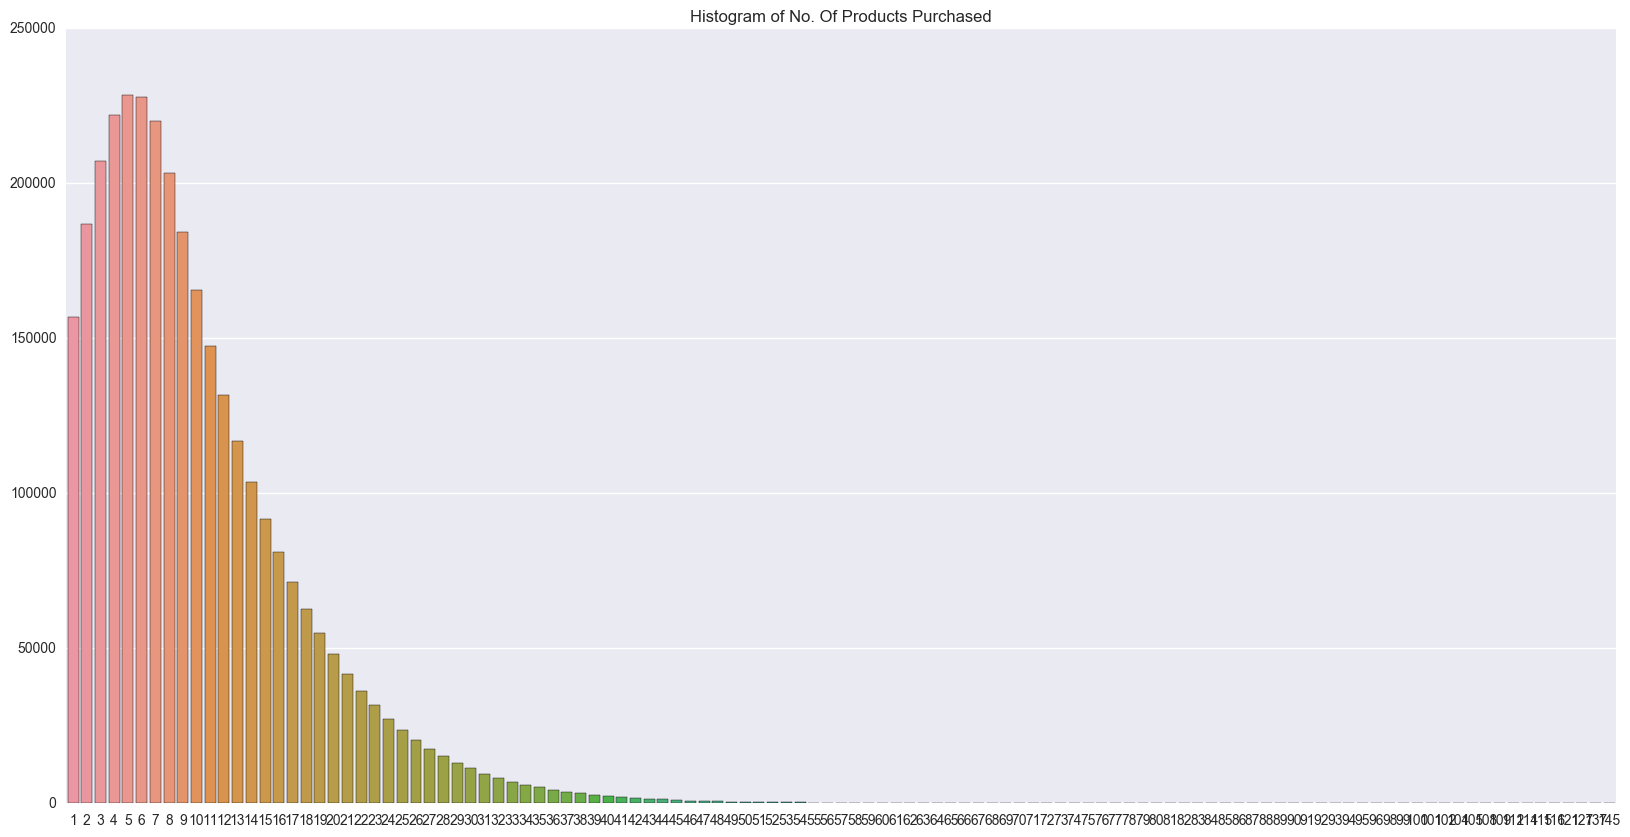

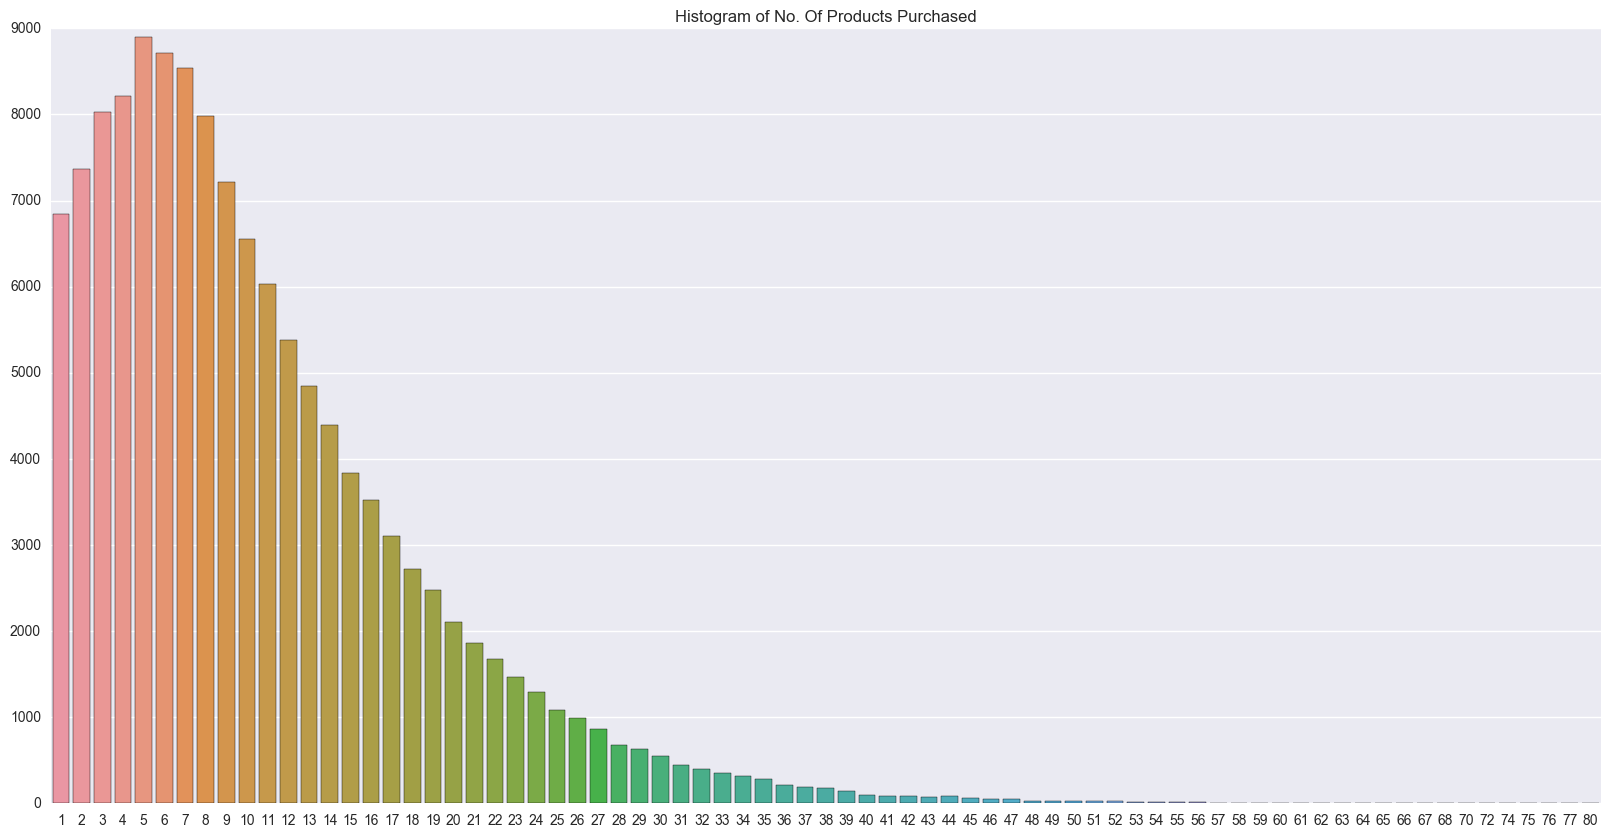

In [10]:
numberitemshist(orderspriorprod)
numberitemshist(orderstrainprod)

It is apparent that for both prior and the most recent orders, orders typically have about 5 products. 

Before, carrying out studies on whether the number of products purchased affects what kinds of products are being purchased, we will first do a barplot for each to see if there is a similar trend in the popularity of products.

In [11]:
def popularitemplot(df, N):
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    sns.barplot(df.product_name.value_counts().head(N).index.values,
                df.product_name.value_counts().head(N).values)
    ax.set_title('Top ' + str(N) + '  Products Purchased')
    ax.set_ylabel('Number of Products')
    plt.show()

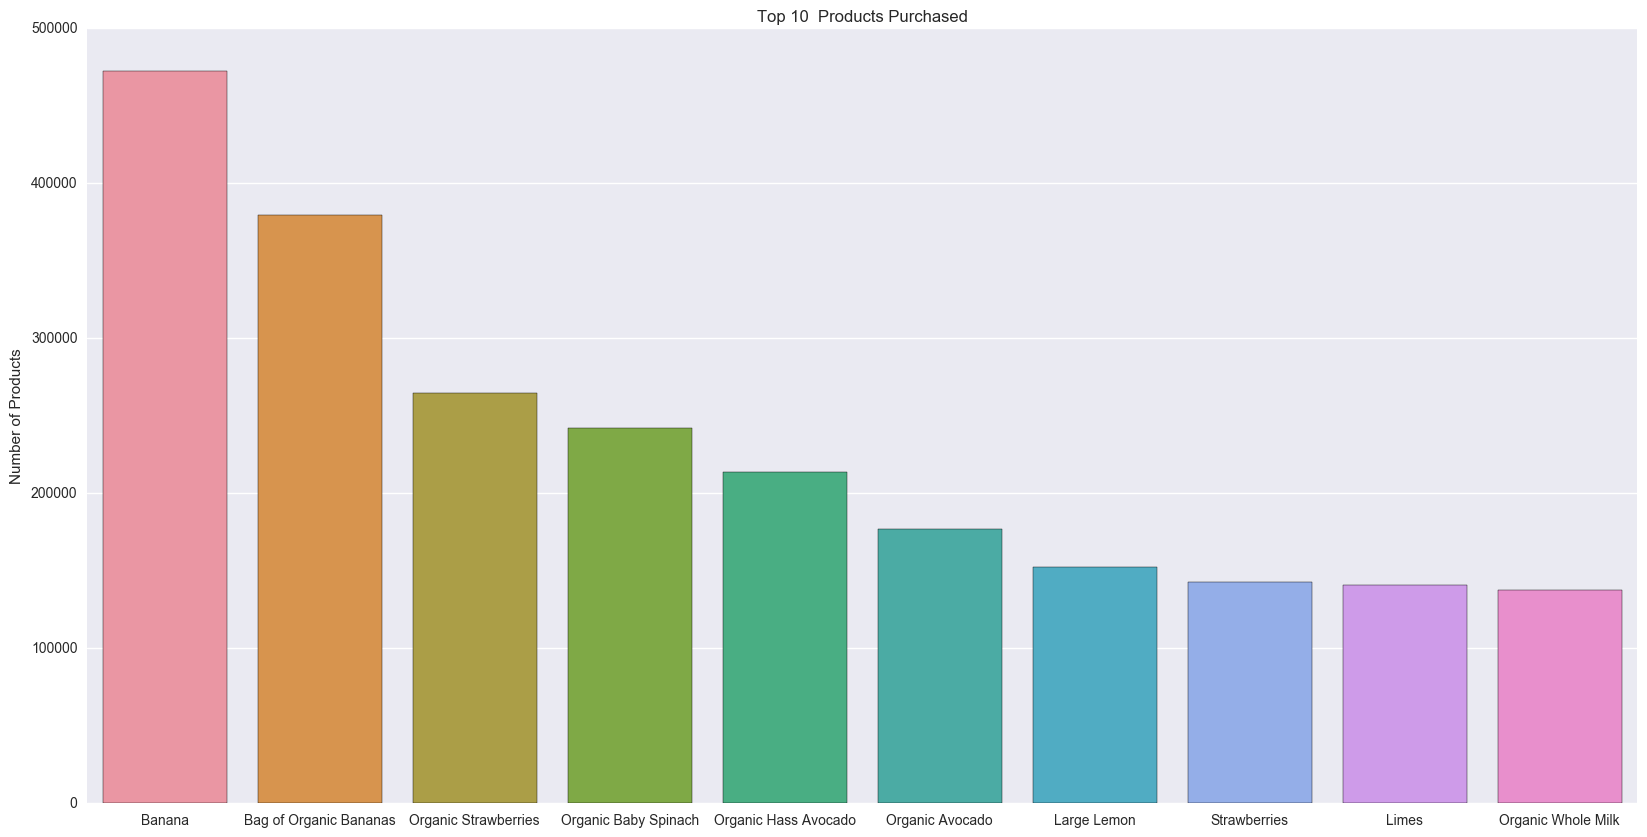

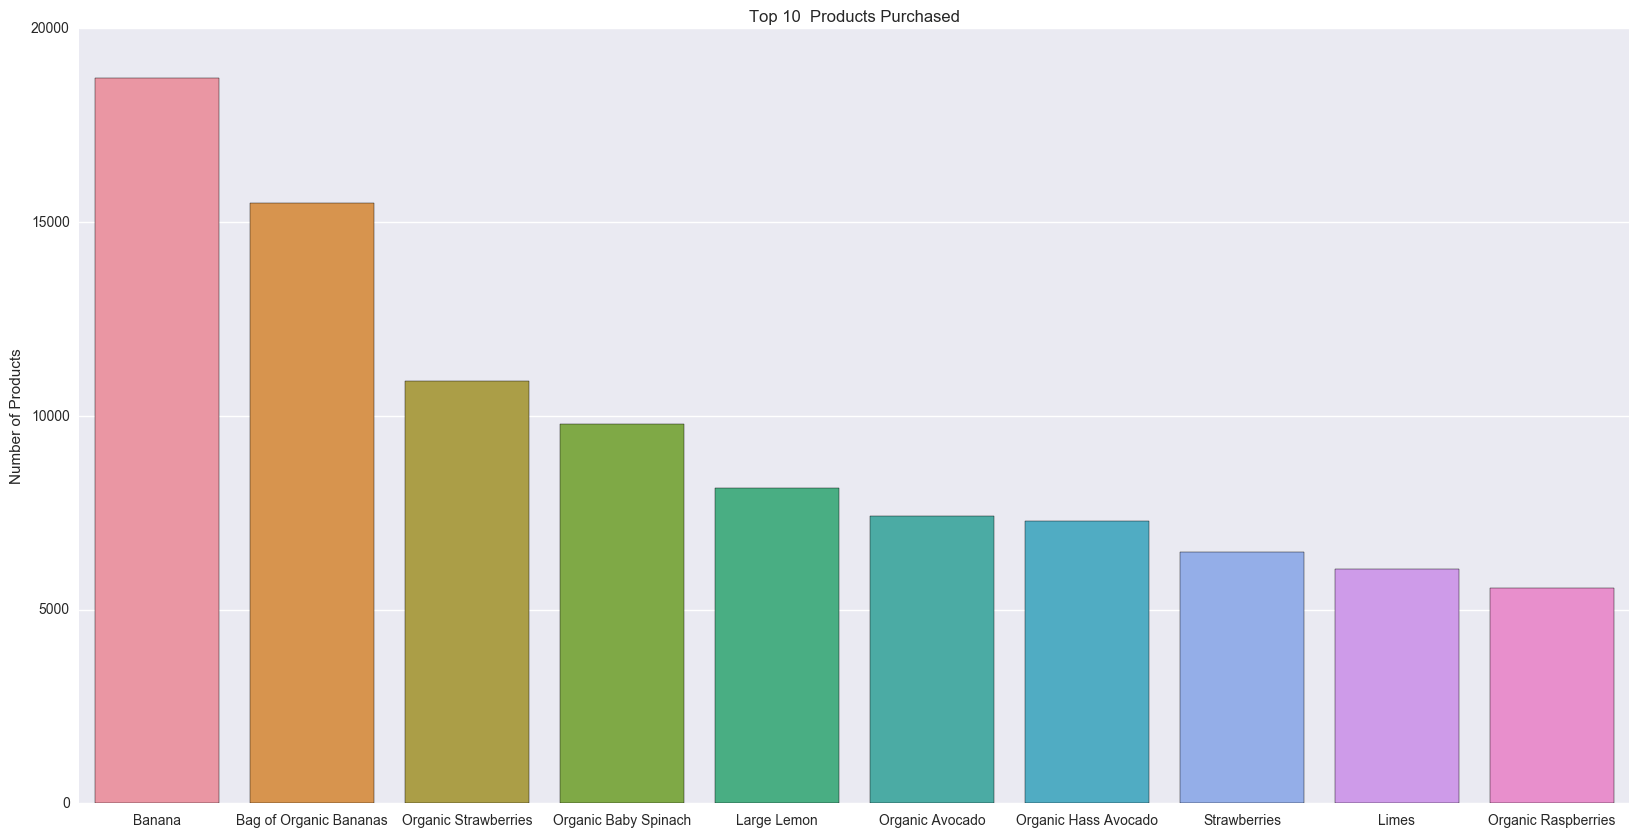

In [12]:
popularitemplot(orderspriorprod, 10)
popularitemplot(orderstrainprod, 10)

Fruits are the most popular products that are purchased by customers. 

In [13]:
def cartorderplot(df, N):
    for n in range(1, N):
        fig = plt.figure(figsize = (20,10)) 
        ax = fig.gca()
        sns.barplot(df[df['add_to_cart_order'] == n].product_name.value_counts().head(10).index.values,
                    df[df['add_to_cart_order'] == n].product_name.value_counts().head(10).values)
        ax.set_title('Top 10 products ordered ' + str(n) + ' place')
        plt.show()

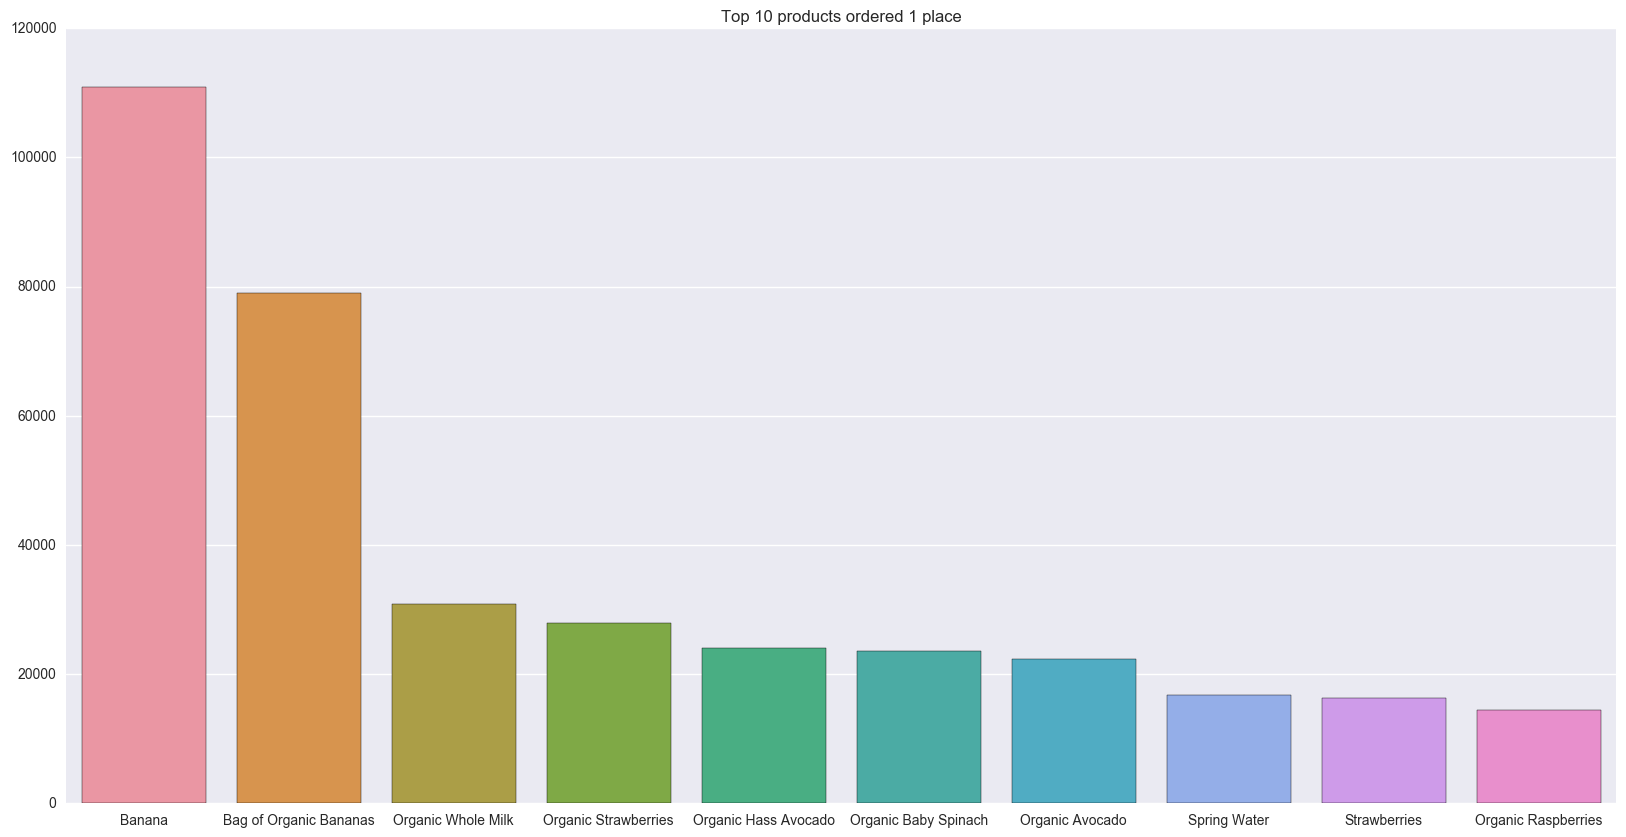

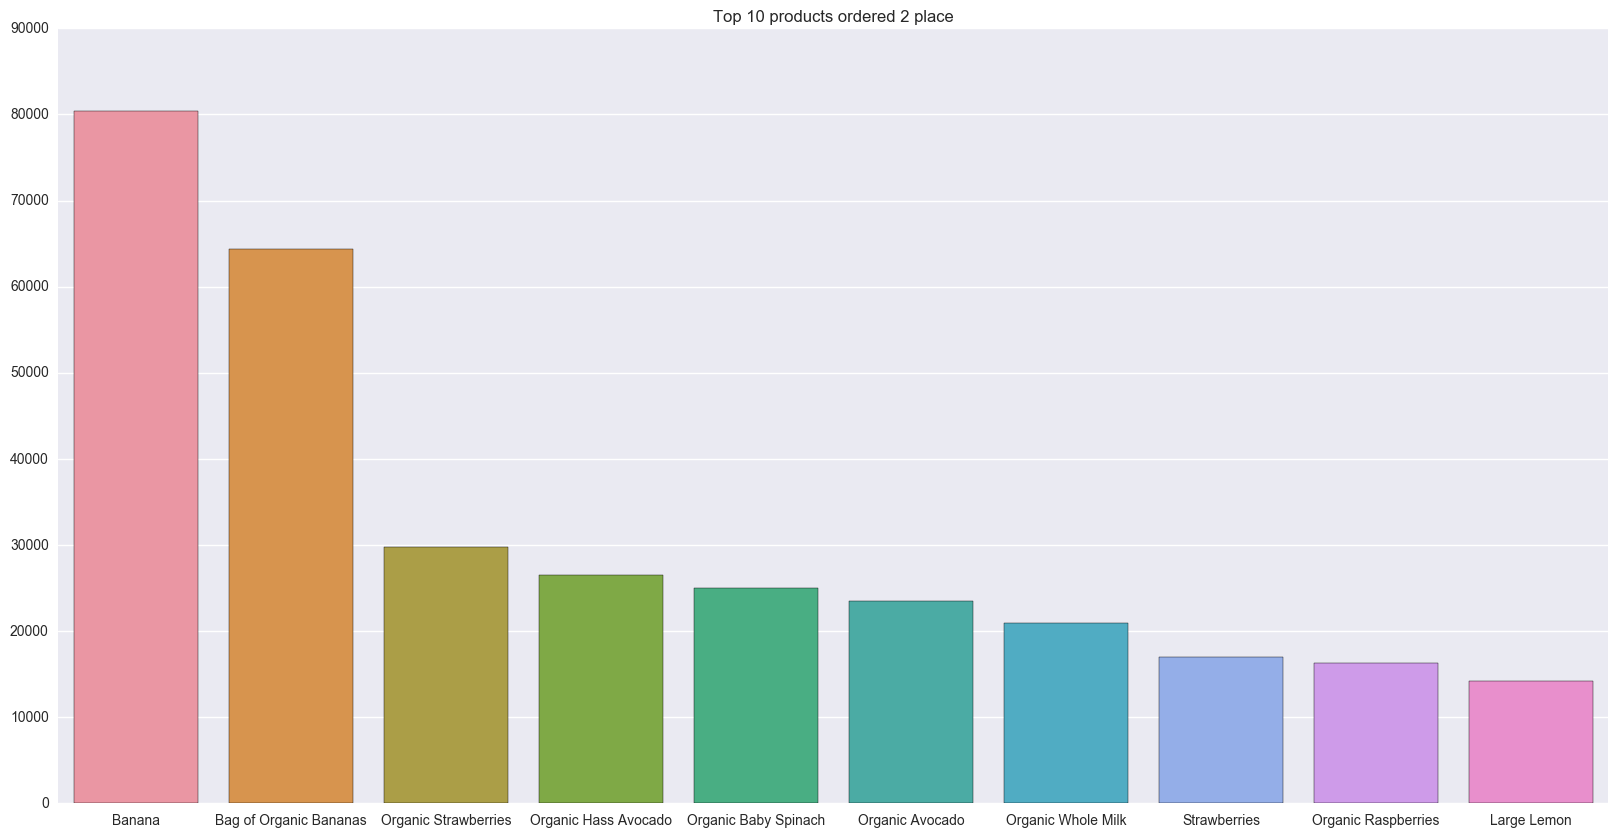

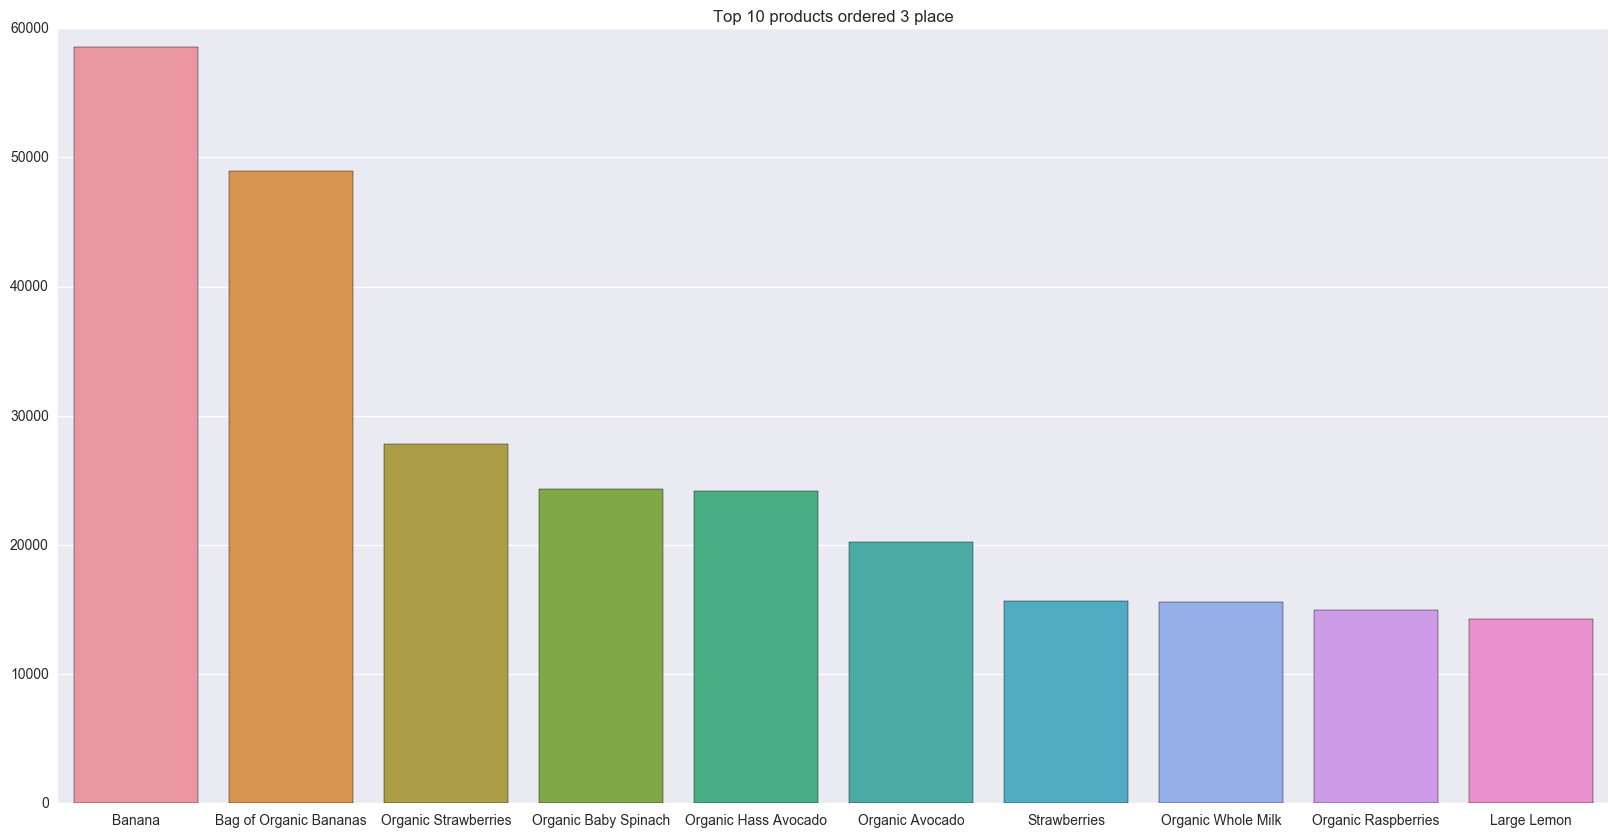

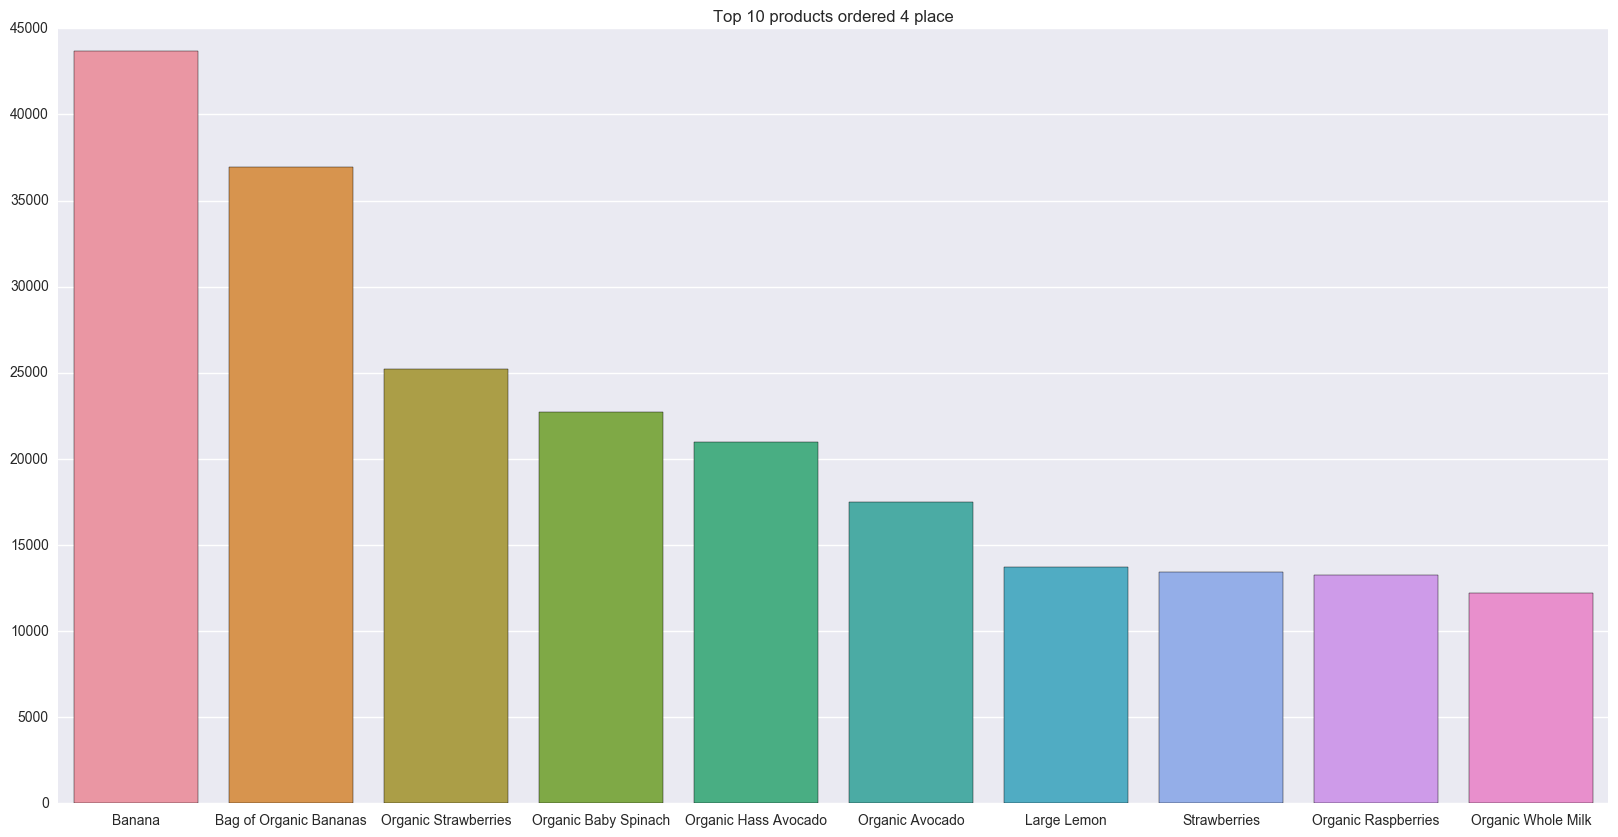

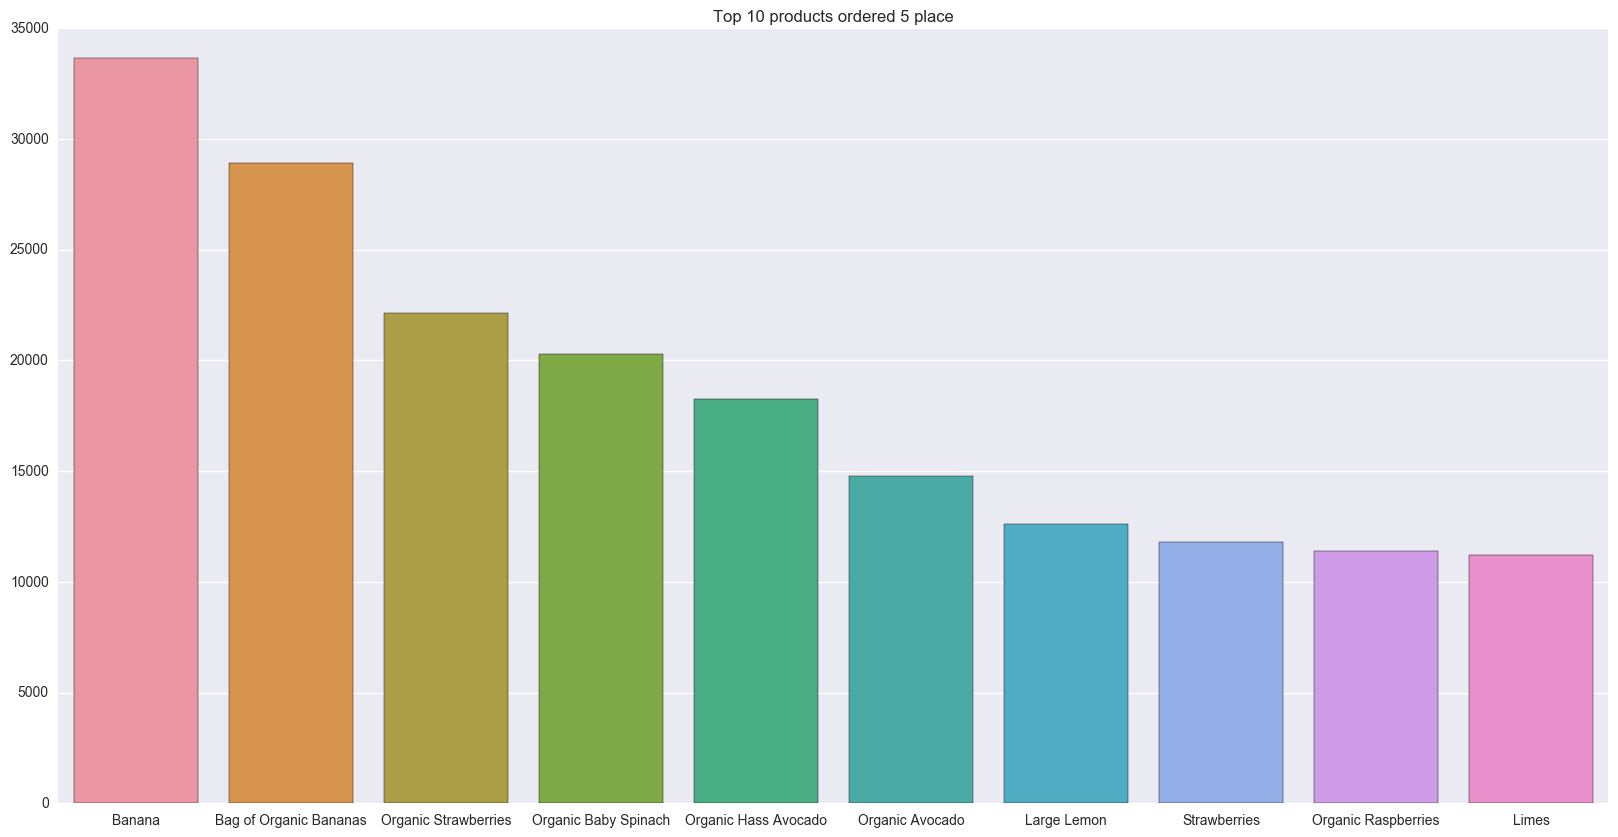

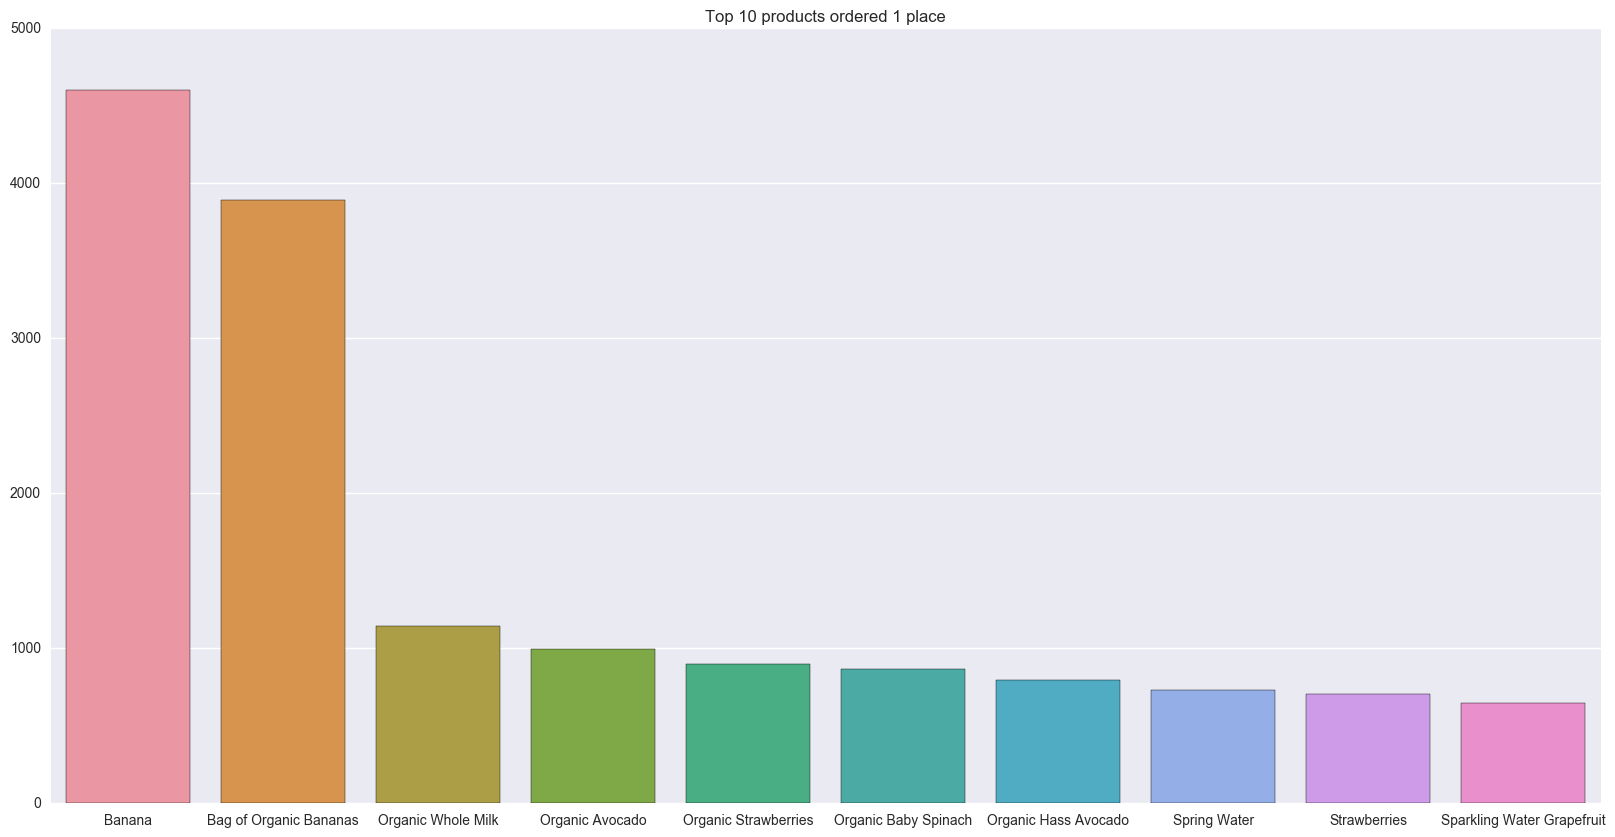

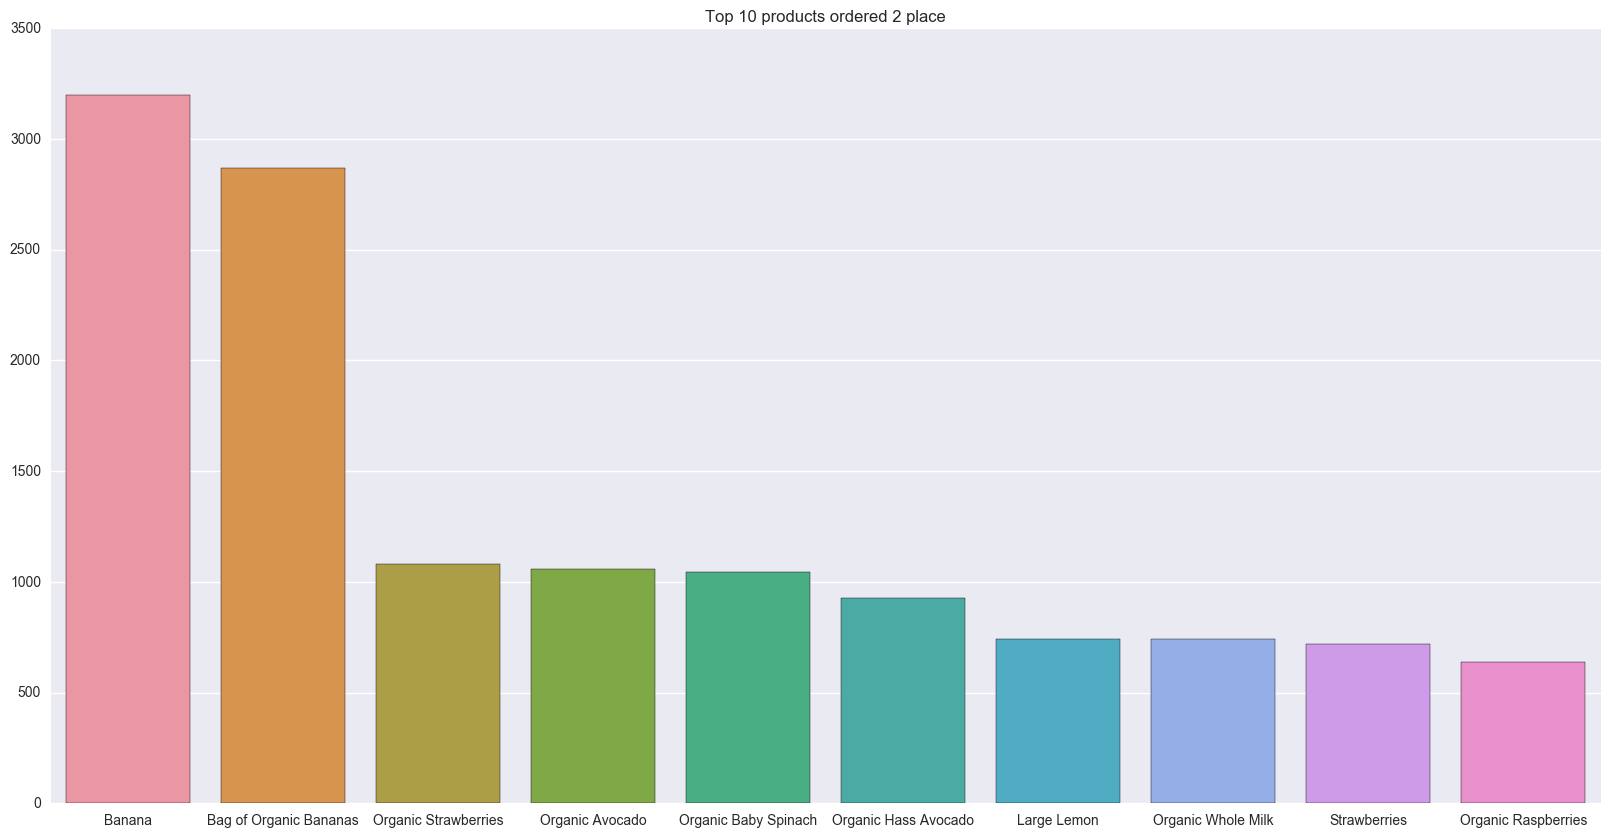

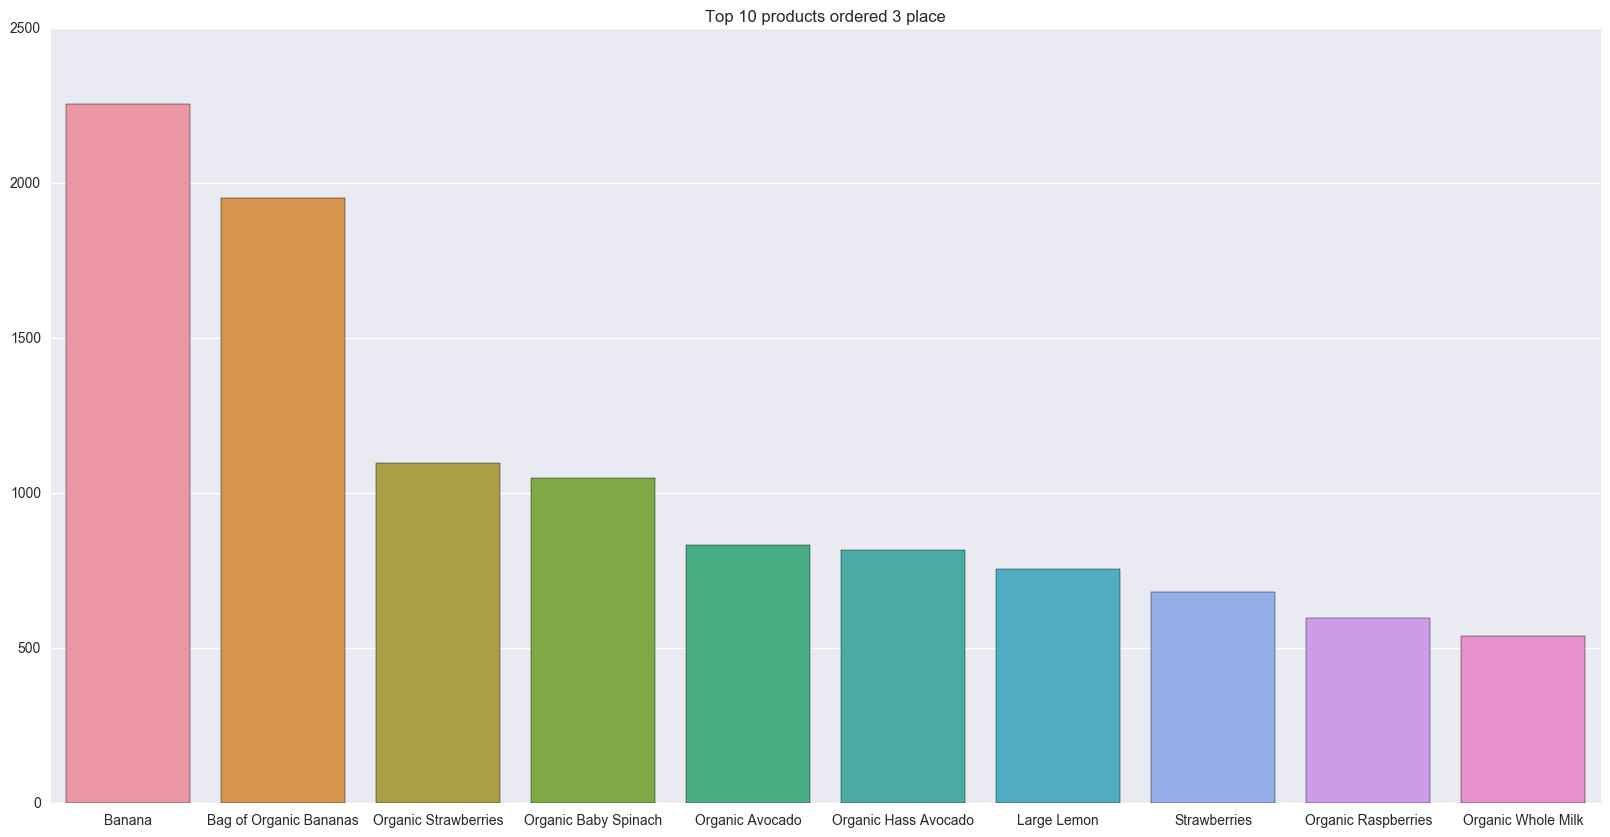

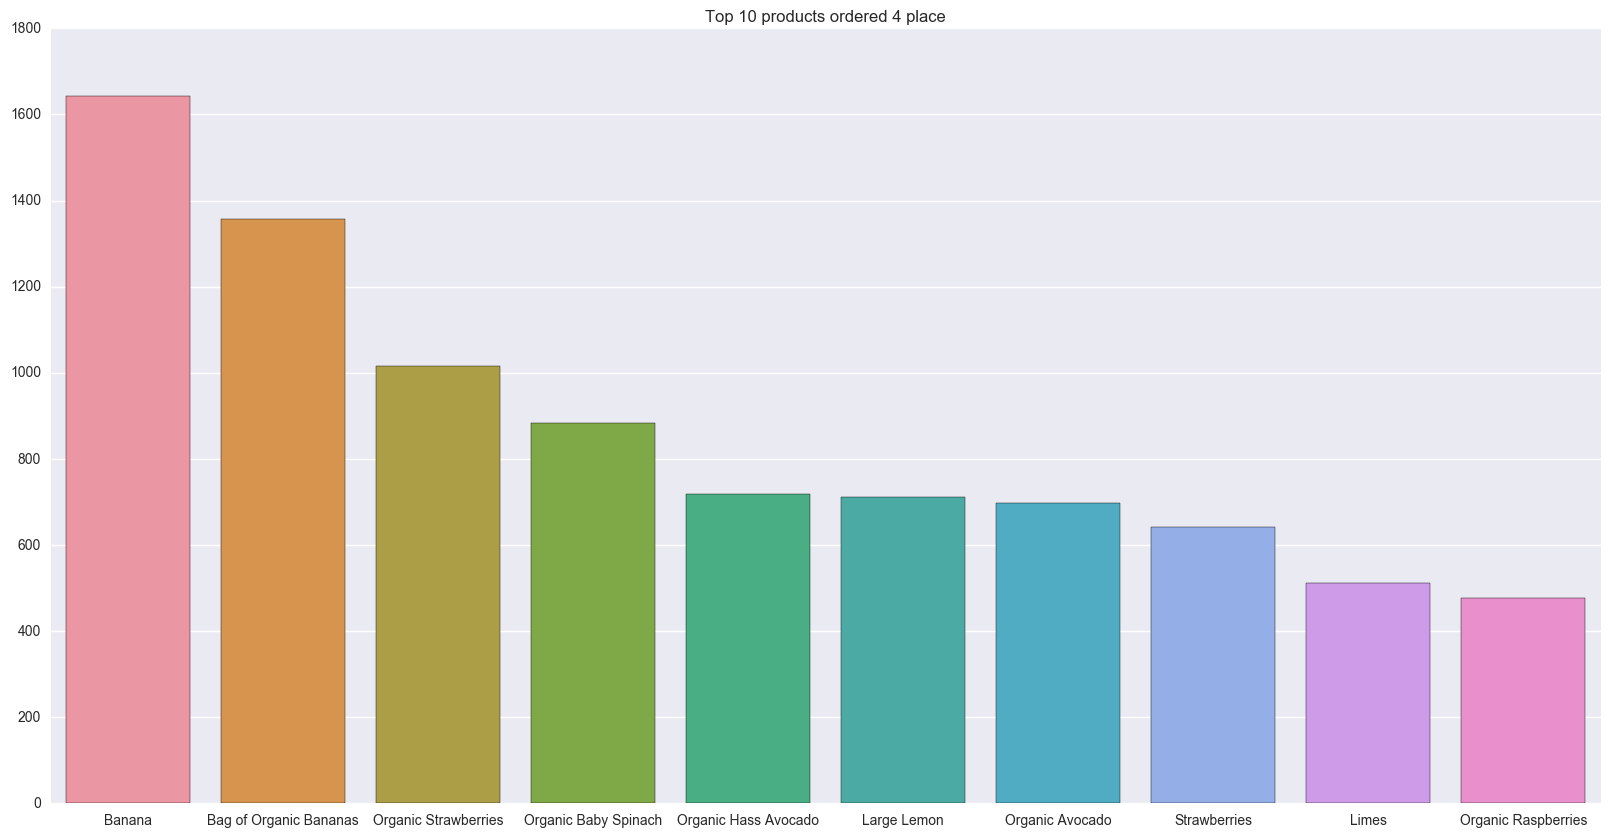

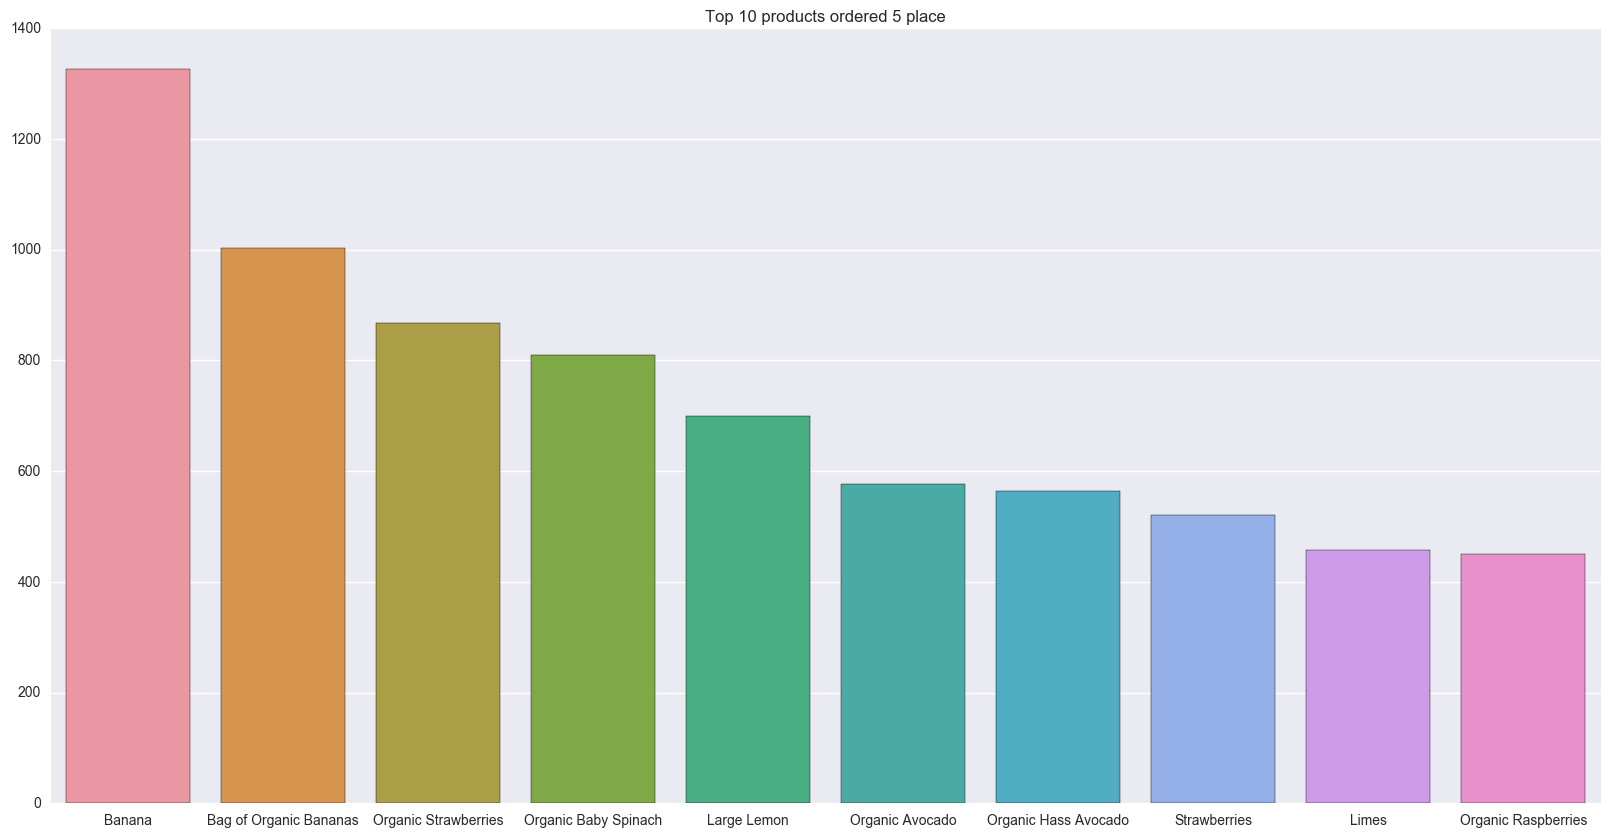

In [14]:
cartorderplot(orderspriorprod, 6)
cartorderplot(orderstrainprod, 6)

Clearly, Bananas are clearly the most popular product. In general, fruits and vegetables are very popular, along with whole milk and spring water. The order in which products are placed in the cart, show a largely similar trend to a product's popularity, indicating that for people who purchase more than one product, they were likely to at least purchase a fruit.

To get a better insight on that, perhaps, looking at how the number of purchases may result in a differing popularity in products. For example, do people who only make one purchase still buy bananas or do they buy something else. Since, it seems a little weird that most people who only make one purchase to buy bananas. 

In [15]:
def numberprodeffect(df, N, top):
    temp = df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
    temp = temp[temp['add_to_cart_order'] == N]
    tempid = temp.order_id.tolist()
    temp2 = df[df['order_id'].isin(tempid)]
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    sns.barplot(temp2.product_name.value_counts().head(top).index.values,
                temp2.product_name.value_counts().head(top).values)
    ax.set_title('Products purchased when a total of ' + str(N) + ' products are purchased')
    plt.show()

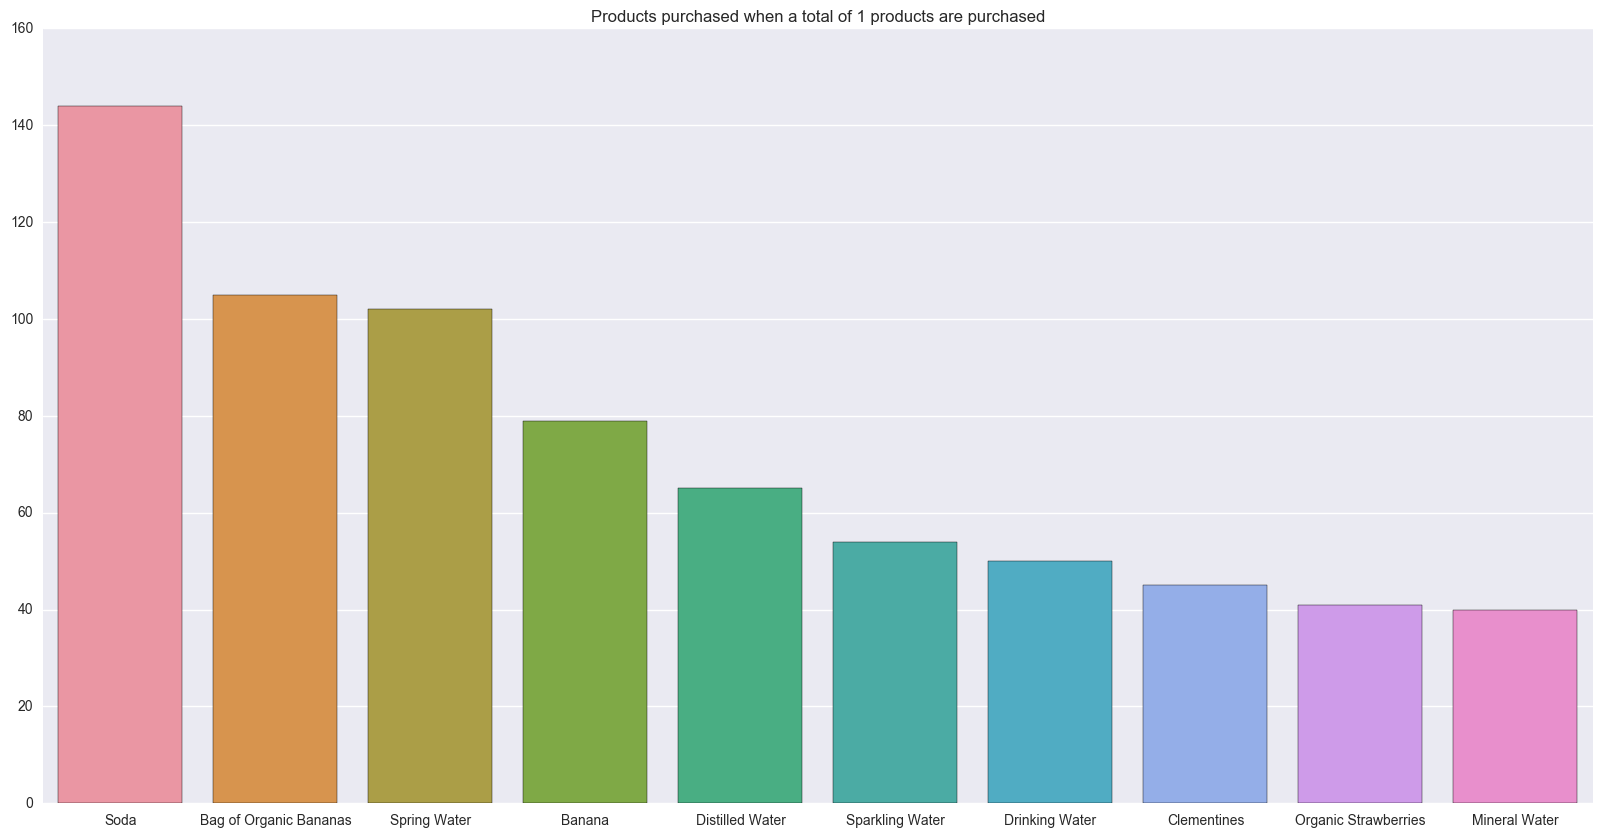

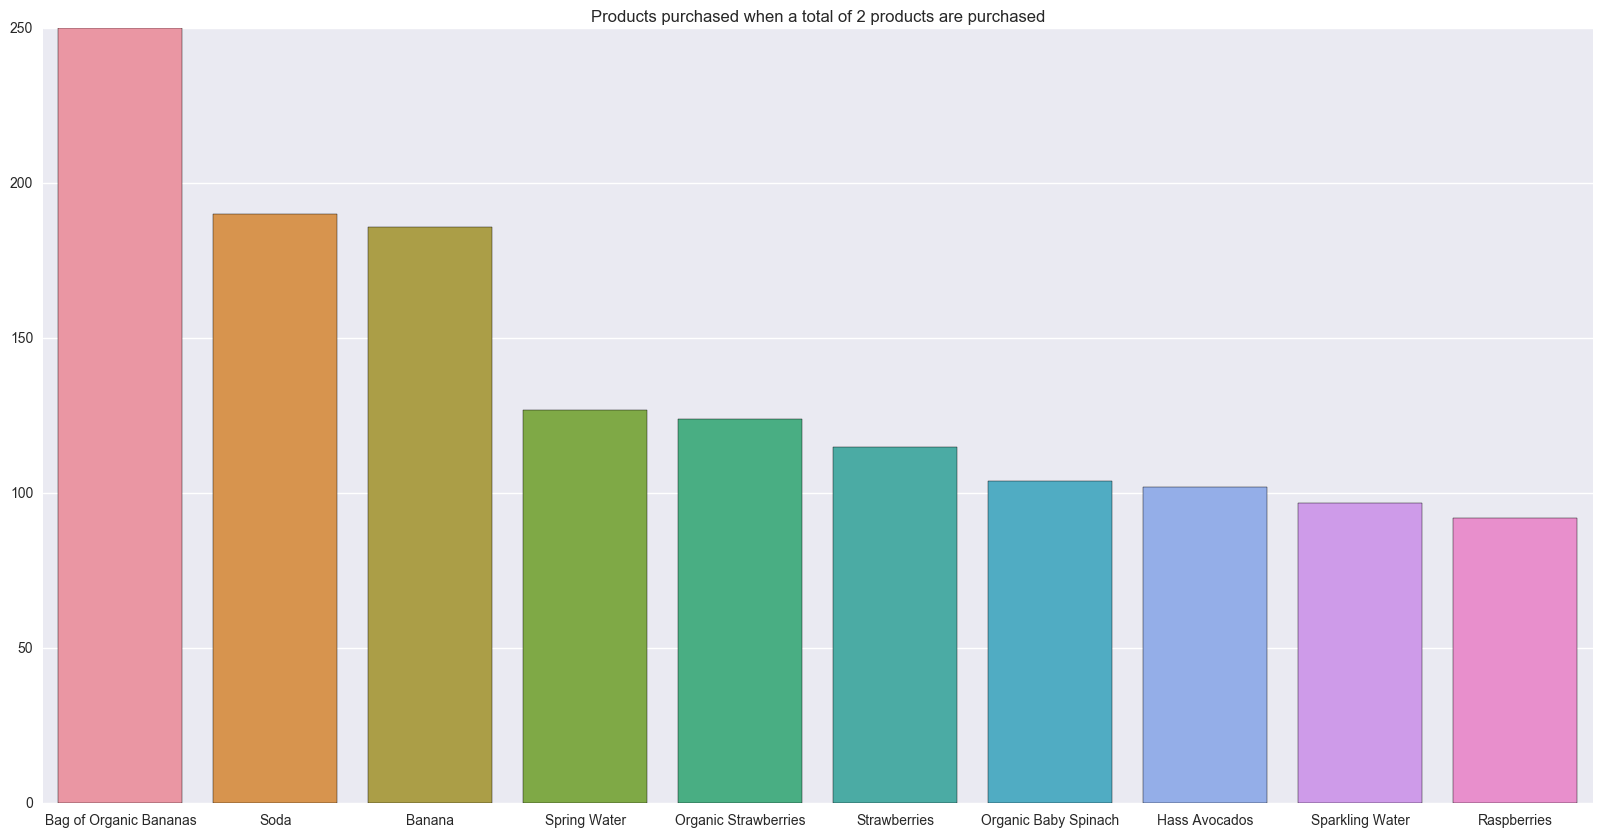

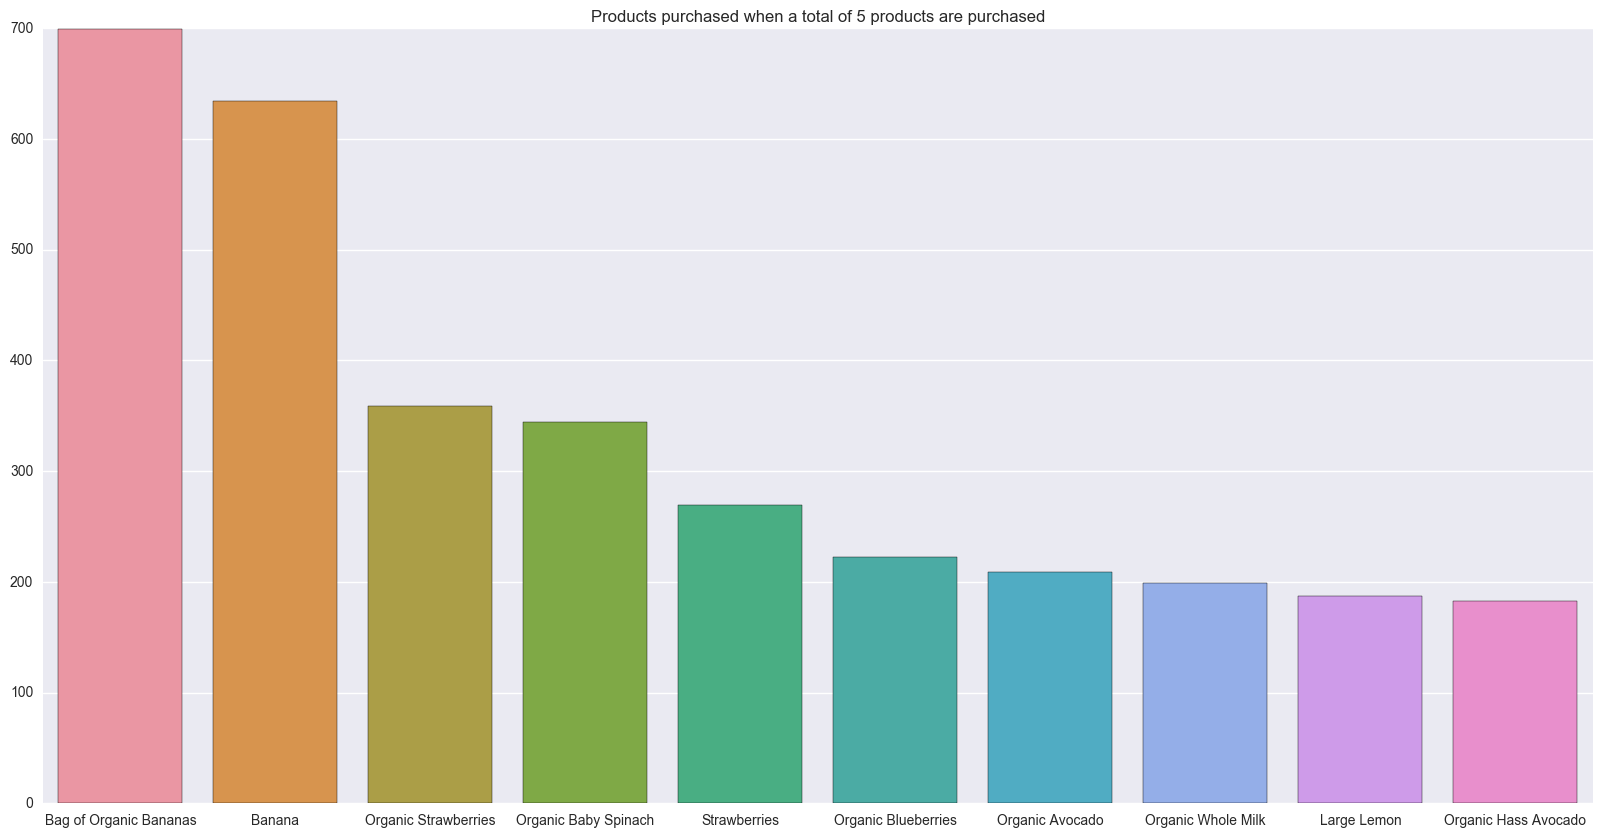

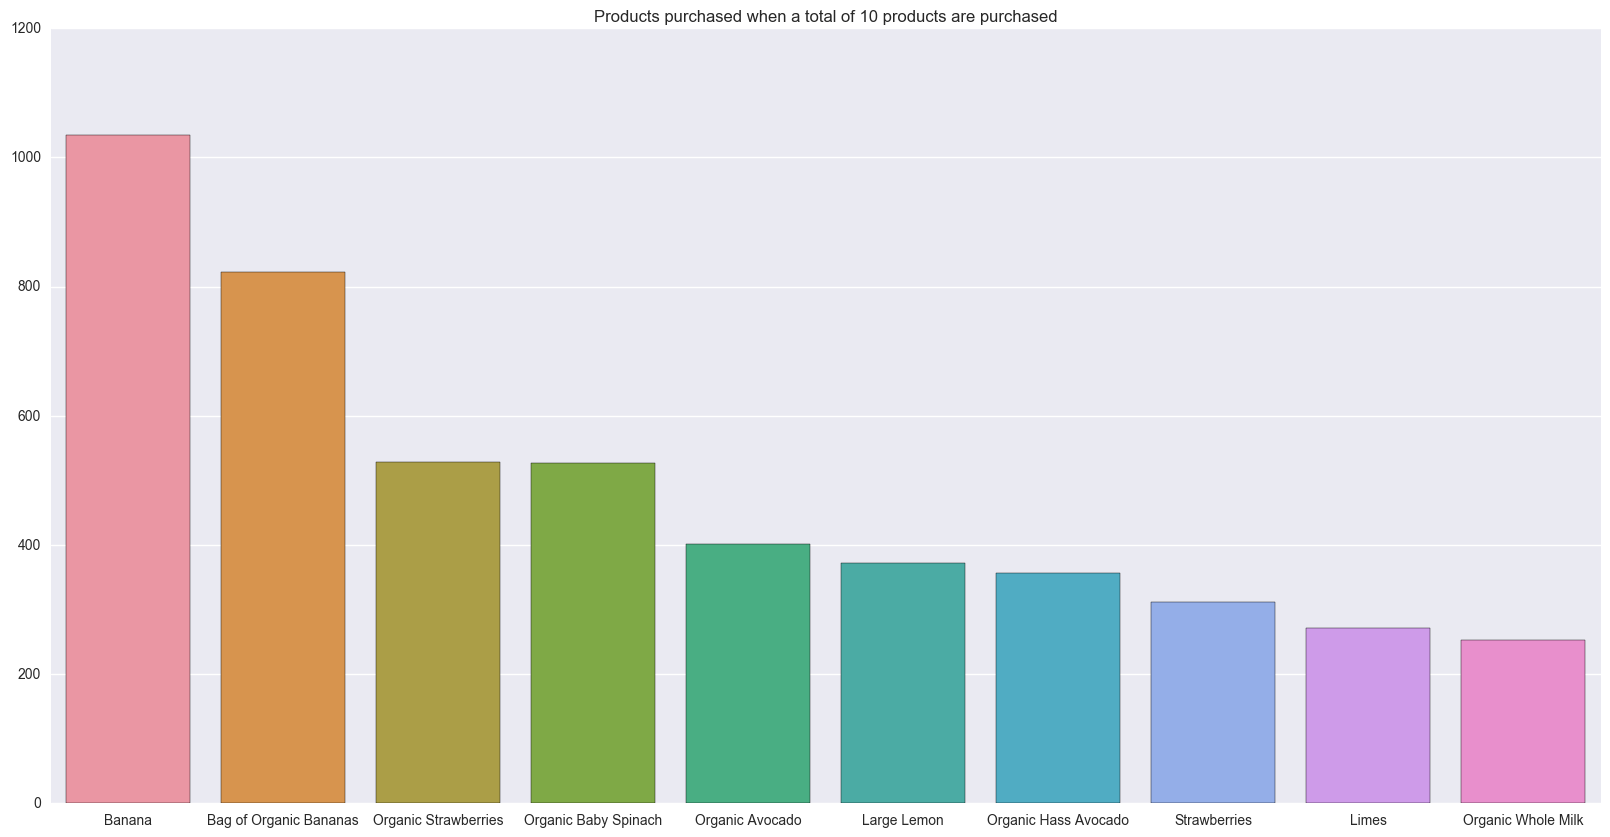

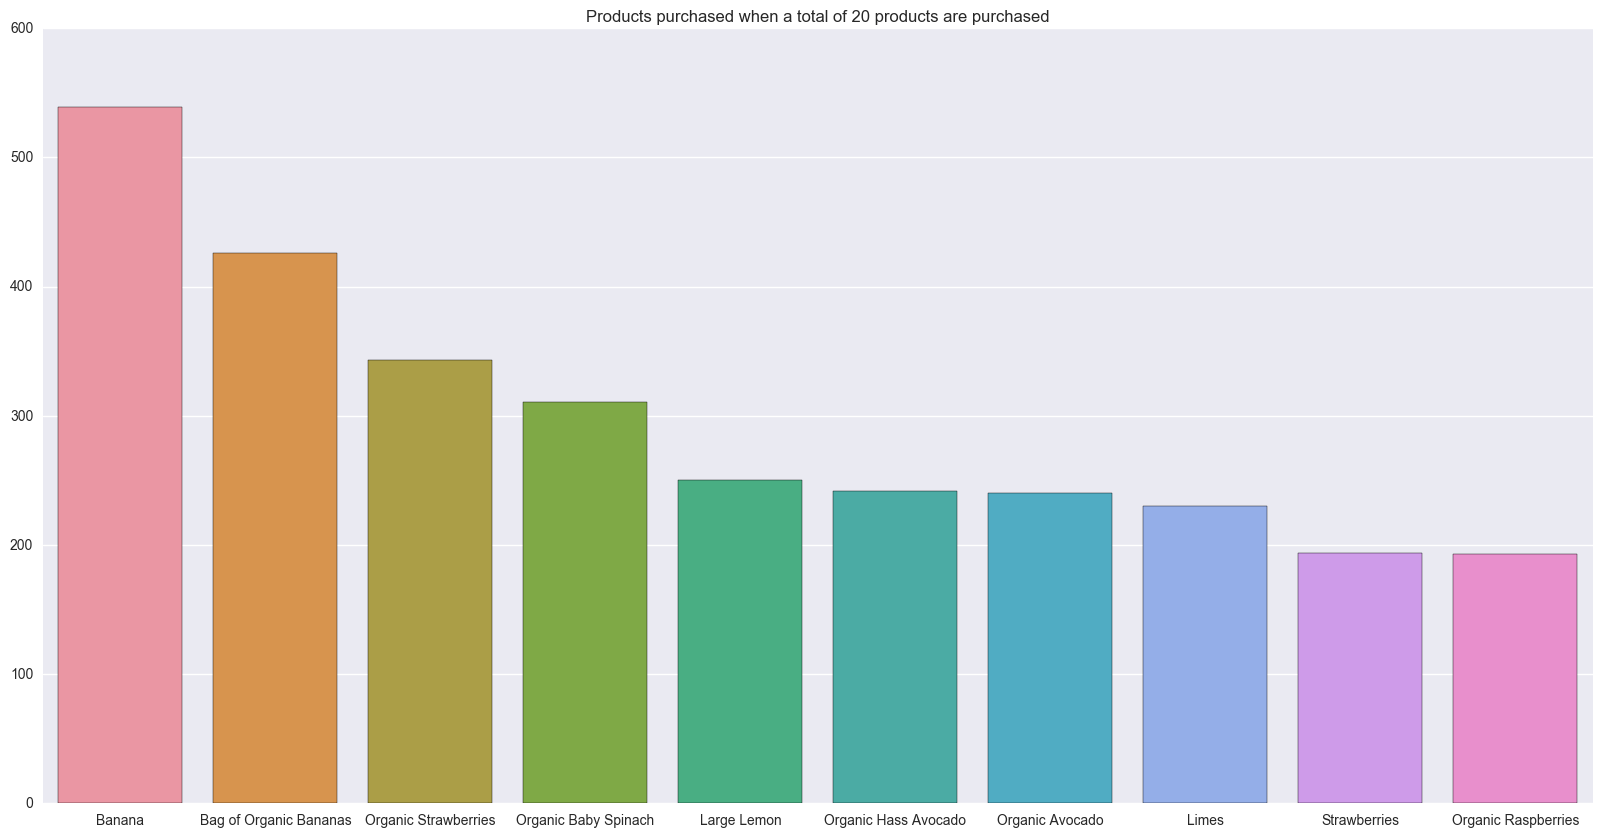

In [16]:
numberprodeffect(orderstrainprod, 1, top = 10)
numberprodeffect(orderstrainprod, 2, top = 10)
numberprodeffect(orderstrainprod, 5, top = 10)
numberprodeffect(orderstrainprod, 10, top = 10)
numberprodeffect(orderstrainprod, 20, top = 10)

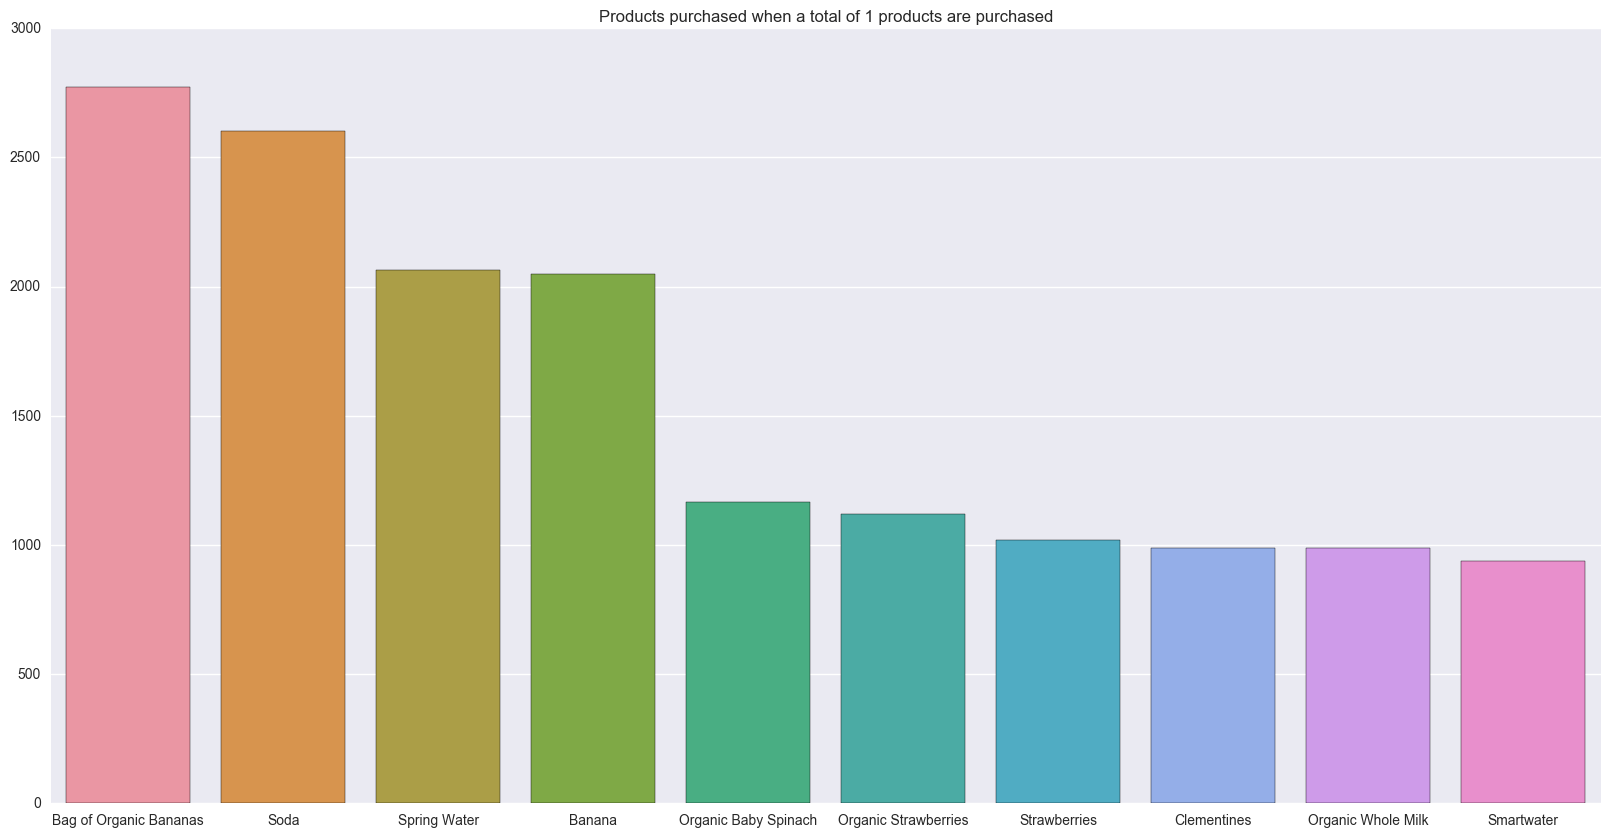

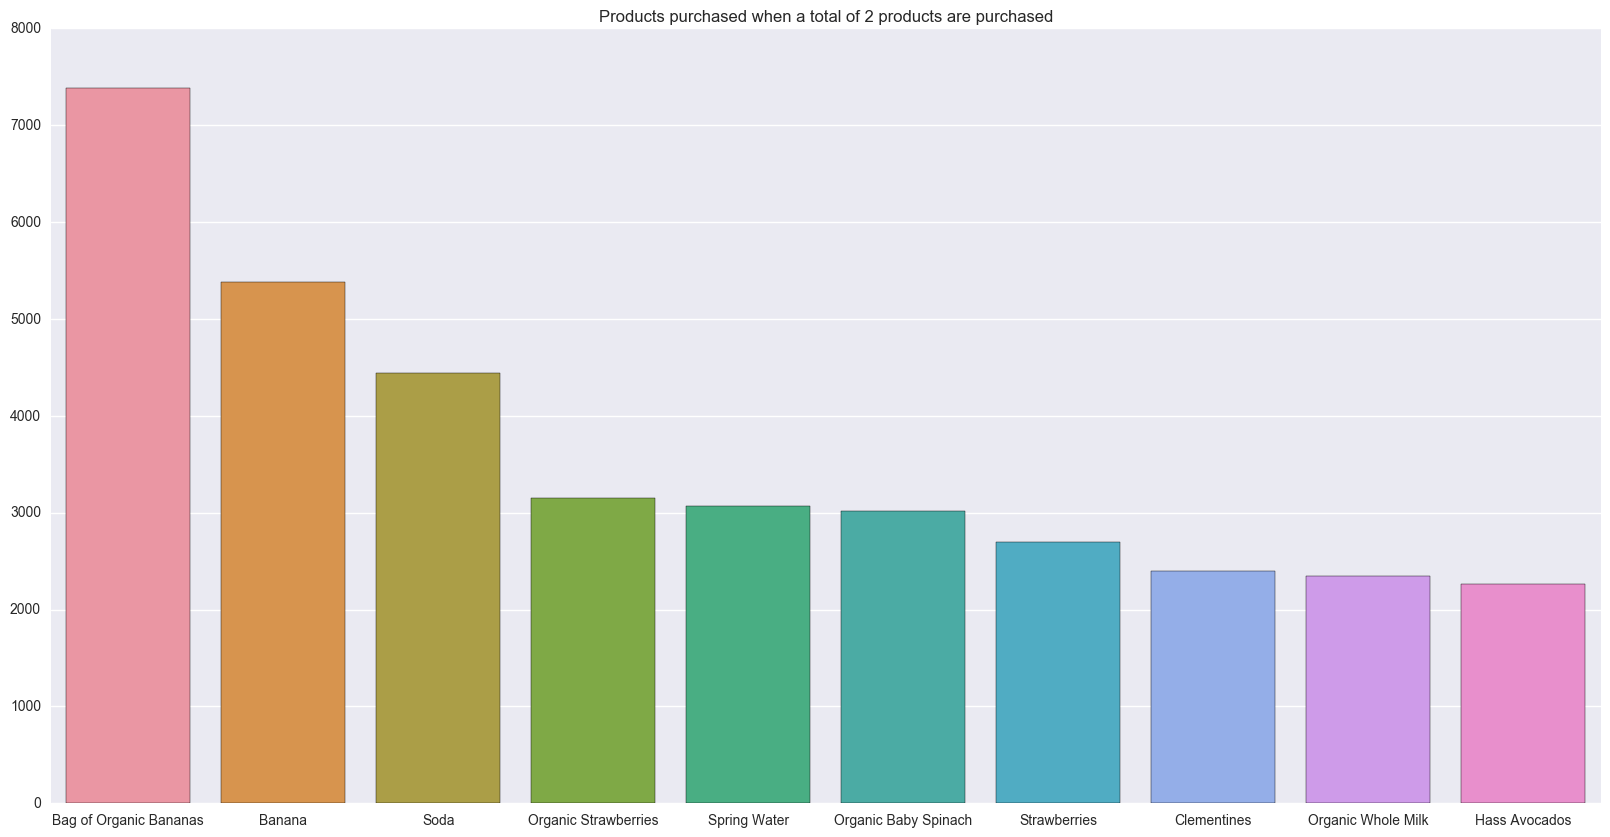

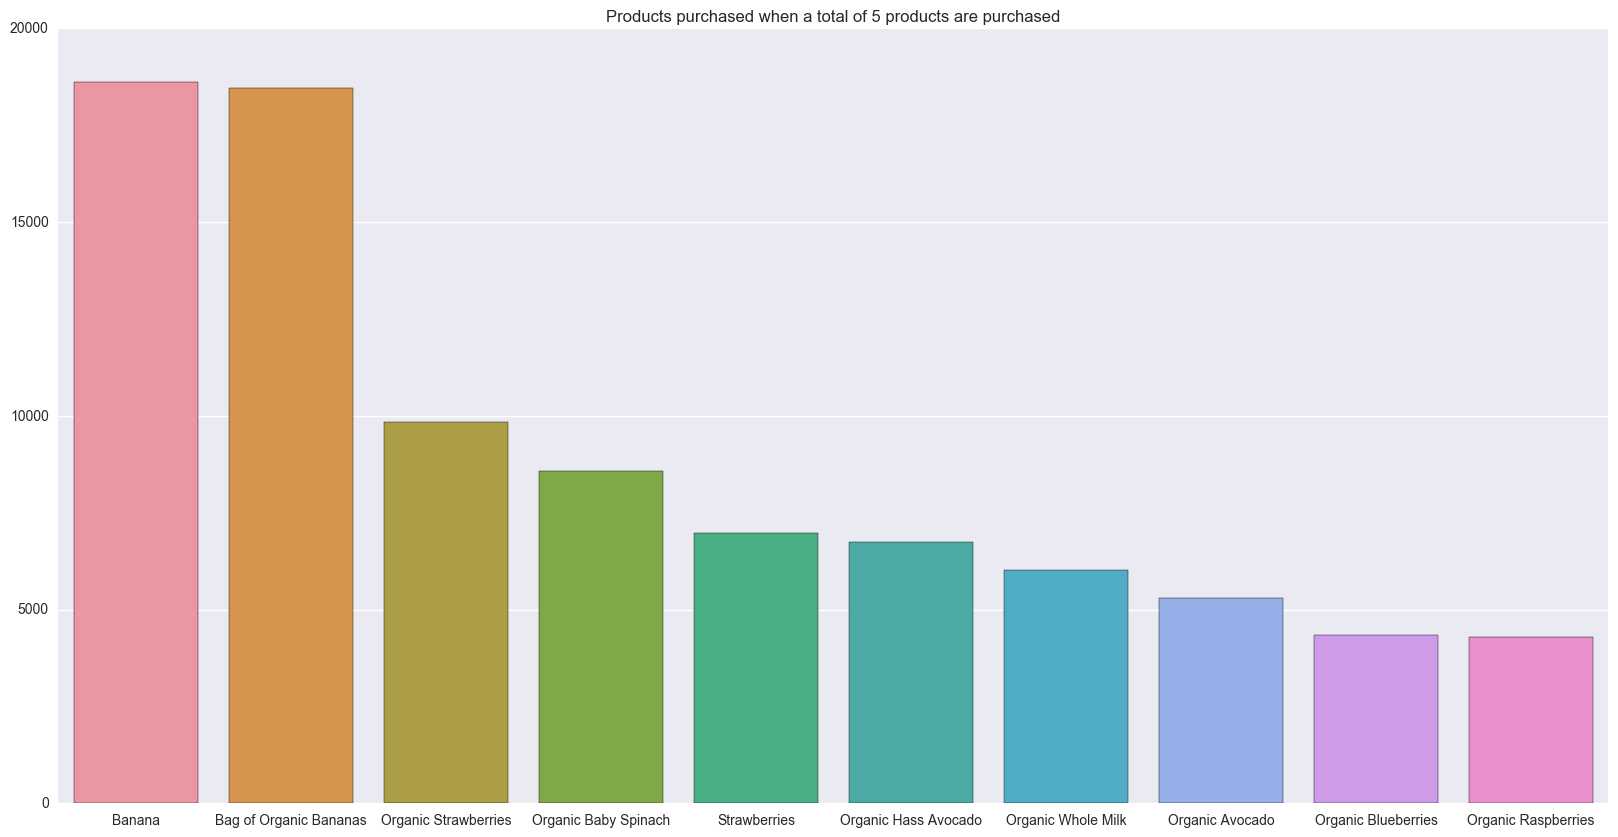

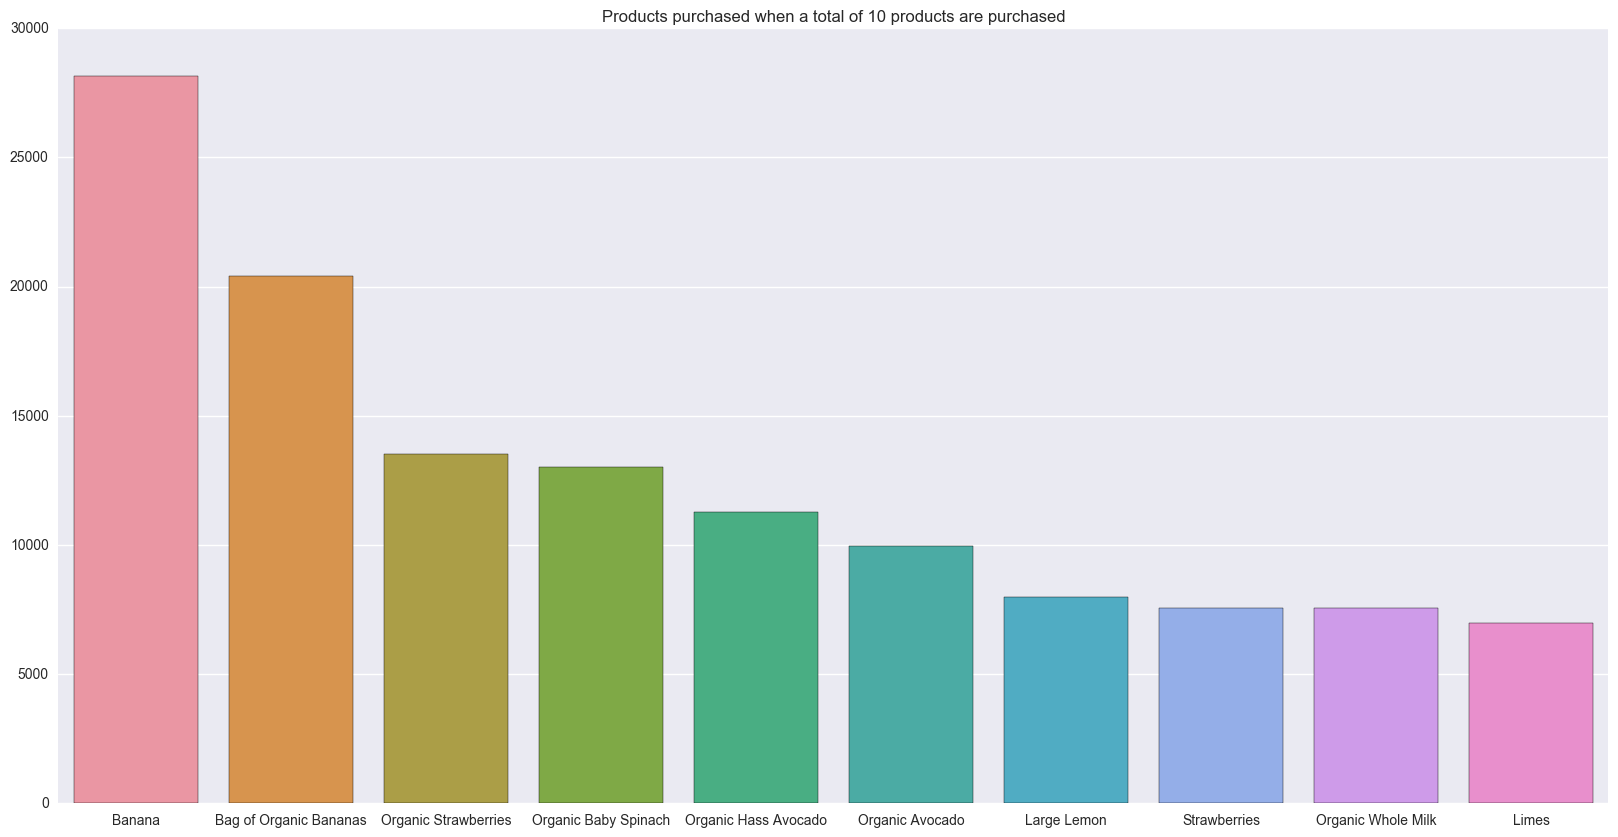

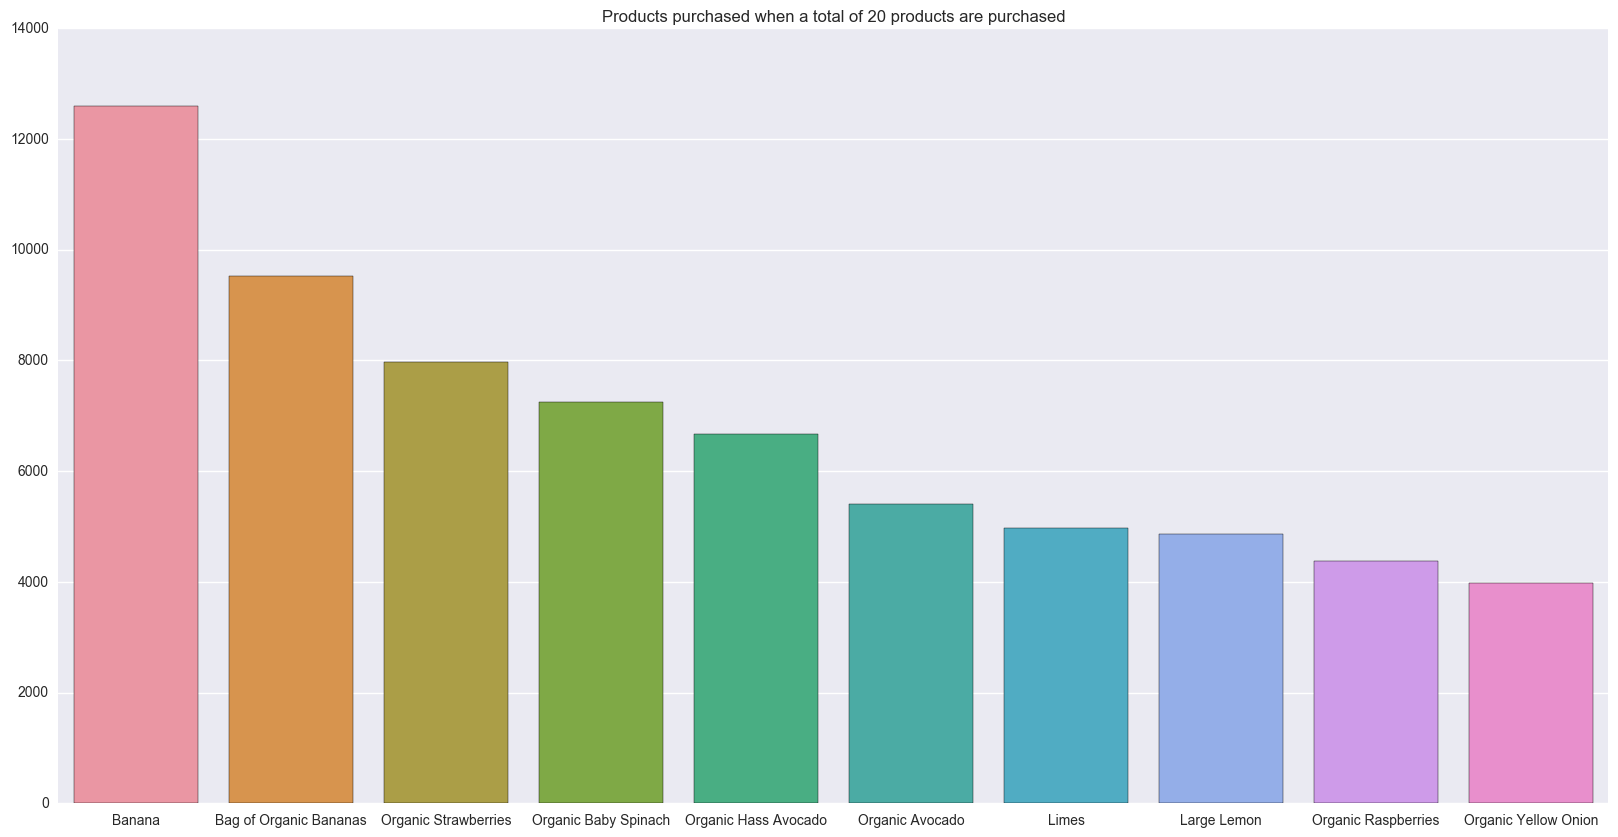

In [17]:
numberprodeffect(orderspriorprod, 1, top = 10)
numberprodeffect(orderspriorprod, 2, top = 10)
numberprodeffect(orderspriorprod, 5, top = 10)
numberprodeffect(orderspriorprod, 10, top = 10)
numberprodeffect(orderspriorprod, 20, top = 10)

Clearly, Bananas are still the favored product even amongst customers who have only made a single purchase. Although it is important to note that amongst customer orders with 1 or 2 purchases only, beverages such as springwater, smartwater, sparkling drinks, soda can be observed to be much more popular. 

Perhaps, people who made fewer purchases may not be grocery shopping per se as opposed to those who made larger purchases. 

Which leads to the follow-up questions, are the people who made 1 or 2 purchases only regular grocery shoppers or are they just one time shoppers?

Thus, we have to see the number of orders made by customers based on the average number of purchases they make on every order.

In [18]:

## create a temporory dataframe that shows customers with their orders and respective total purchases
ordersprior1 = pd.merge(orders[orders['eval_set'] == 'prior'][['user_id','order_id']], orderspriorprod, on = 'order_id', how = 'inner')
temp = ordersprior1.groupby(['user_id', 'order_id'])['add_to_cart_order'].aggregate('max').reset_index()

## create a temporary dataframe that shows customers with their mean and median purchases every order
temp2 = temp.groupby('user_id')['add_to_cart_order'].aggregate({'Mean Purchases': 'mean', 'Median Purchases': 'median'}).reset_index()
temp2 = temp2.apply(lambda x: (round(x)))
temp2['Mean Purchases'] = temp2['Mean Purchases'].astype(int)

## create a temporary dataframe that shows customers with the total orders they have made
temp3 = temp.groupby('user_id')['order_id'].aggregate({'Total Orders': 'count'}).reset_index()

## create a temporary dataframe that shows customers with their highest number of purchases amongst their orders
temp4 = temp.groupby('user_id')['add_to_cart_order'].aggregate({'Highest Purchases: ' : 'max'}).reset_index()

ordersandpurchases = pd.merge(temp3, temp2, on = 'user_id', how = 'inner')
ordersandpurchases = pd.merge(ordersandpurchases, temp4, on = 'user_id', how = 'inner')
print(ordersandpurchases.head(5))

   user_id  Total Orders  Mean Purchases  Median Purchases  \
0        1            10               6               6.0   
1        2            14              14              14.0   
2        3            12               7               7.0   
3        4             5               4               3.0   
4        5             4               9              10.0   

   Highest Purchases:   
0                    9  
1                   26  
2                   11  
3                    7  
4                   12  


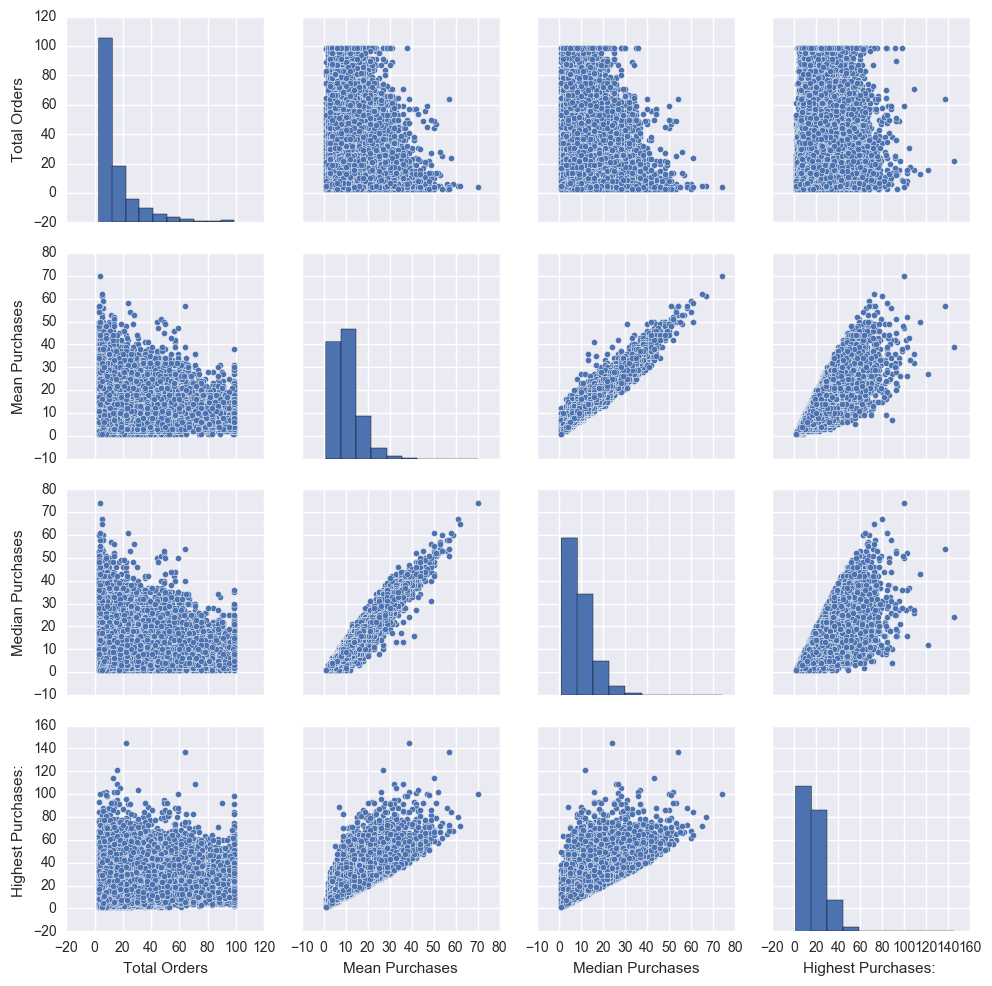

In [19]:
sns.pairplot(ordersandpurchases[['Total Orders', 'Mean Purchases', 'Median Purchases', 'Highest Purchases: ']])
plt.show()

It's nice to see that the mean and median purchases are largely the same, meaning that the variance in purchases of customers is not that wild. 

Thus, customers can be expected to purchase a certain number of products, based on their means purchases. 

Expectedly, the mean/median purchases are sort of linear with customer's highest purchases. 

Although, it can be seen that there seems to be a negative relationship between the total orders of a customer and their mean purchases. 

Meaning, the higher the orders a customer makes, the lower the number of purchases he is expected to make.

Perhaps, its because a customer needs to make more regular purchases if he purchases less for each order. 

However, this may be due to the skewed left distribution of total orders a customer makes. Due to the large number of customers with less than 20 orders, the number of outliers will also be larger. 

In [20]:
print('Summary Statistics for Orders and Purchases by Customers')
print('\n')

print(ordersandpurchases.describe())
print('\n')

print('Mean and Median Purchases made by Customers who place ____ orders in the order category')
print('\n')

ordersandpurchases['Order Category'] = pd.cut(ordersandpurchases['Total Orders'], bins = [3,5,9,19,99], include_lowest = True,
                                             labels = ['<5', '5-9', '9-19', '>19'])
ordercategories = ordersandpurchases.groupby('Order Category')['Mean Purchases'].aggregate({'Mean Purchases': 'mean', 'Median Purchases': 'median'}).reset_index()
print(ordercategories)
print('\n')

print('Mean and Median Orders made by Customers who purchase ____ products in the purchase category ')
print('\n')

ordersandpurchases['Purchase Category'] = pd.cut(ordersandpurchases['Mean Purchases'], bins = [1,6,9,13,70], include_lowest = True,
                                             labels = ['1-6', '7-9', '10-13', '>13'])
purchasecategories = ordersandpurchases.groupby('Purchase Category')['Total Orders'].aggregate({'Median Orders': 'median', 'Mean Orders' : 'mean'}).reset_index()
print(purchasecategories)


Summary Statistics for Orders and Purchases by Customers


             user_id   Total Orders  Mean Purchases  Median Purchases  \
count  206209.000000  206209.000000    206209.00000     206209.000000   
mean   103105.000000      15.590367         9.95105          9.528779   
std     59527.555167      16.654774         5.87099          6.019379   
min         1.000000       3.000000         1.00000          1.000000   
25%     51553.000000       5.000000         6.00000          5.000000   
50%    103105.000000       9.000000         9.00000          8.000000   
75%    154657.000000      19.000000        13.00000         12.000000   
max    206209.000000      99.000000        70.00000         74.000000   

       Highest Purchases:   
count        206209.000000  
mean             17.654865  
std              10.192818  
min               1.000000  
25%              10.000000  
50%              16.000000  
75%              23.000000  
max             145.000000  


Mean and Median Purc

The minimum number of orders a customer has made is 3. 

To check if the number of orders a customer makes affects the number of purchases he makes, we categorize the customers into 4 bins, based how many orders they make. (3-5, 5-9, 9-19, >19) This is based on the 4 quartiles obtained by the summary statistics of the orders and purchases made by a customer. 

The table obtained does not show any clear meaningful relationship between the number of orders a customer makes and the mean number of purchases apart from a slightly lower mean/median purchase for customers who have made less than 5 orders. 

However, on the other hand, categorizing the median number of purchases a customer makes instead reveals a slightly clearer picture/relationship. Customers who make a smaller number of purchases per order are also observed to make less orders. 

Now, we have to check if the number of orders and the number of purchases a customer makes has any kind of effect on the kind of product purchased by them. 

In [21]:
ordersprior1 = pd.merge(ordersprior1, ordersandpurchases, on = 'user_id', how = 'inner')

In [22]:
for n in ['1-6', '7-9', '10-13', '>13']:
    print('Top 10 Products depending on Purchase Category ' + n)
    print('\n')
    print(ordersprior1[ordersprior1['Purchase Category'] == n]['product_name'].value_counts(normalize = True).head(10))
    print('\n')

Top 10 Products depending on Purchase Category 1-6


Bag of Organic Bananas    0.016890
Banana                    0.012539
Organic Strawberries      0.007664
Organic Baby Spinach      0.007657
Strawberries              0.007187
Soda                      0.006032
Hass Avocados             0.005458
Raspberries               0.005413
Clementines               0.005313
Organic Blueberries       0.004633
Name: product_name, dtype: float64


Top 10 Products depending on Purchase Category 7-9


Banana                    0.016206
Bag of Organic Bananas    0.012307
Organic Strawberries      0.007862
Organic Baby Spinach      0.007520
Organic Hass Avocado      0.006491
Organic Avocado           0.005481
Large Lemon               0.004686
Organic Whole Milk        0.004548
Strawberries              0.004301
Limes                     0.004276
Name: product_name, dtype: float64


Top 10 Products depending on Purchase Category 10-13


Banana                    0.016200
Bag of Organic Bananas    0.01

Apart from the customers who only make a single purchase, the rest are all observed to buy fruits.

In [23]:
for n in ['<5', '5-9', '9-19', '>19']:
    print('Top 10 Products depending on Order Category ' + n)
    print('\n')
    print(ordersprior1[ordersprior1['Order Category'] == n]['product_name'].value_counts(normalize = True).head(10))
    print('\n')

Top 10 Products depending on Order Category <5


Banana                    0.013455
Bag of Organic Bananas    0.009076
Organic Baby Spinach      0.006979
Organic Strawberries      0.006062
Organic Avocado           0.005911
Large Lemon               0.005037
Organic Hass Avocado      0.004638
Strawberries              0.004596
Limes                     0.004122
Cucumber Kirby            0.003314
Name: product_name, dtype: float64


Top 10 Products depending on Order Category 5-9


Banana                    0.013452
Bag of Organic Bananas    0.009505
Organic Baby Spinach      0.006899
Organic Strawberries      0.006322
Organic Avocado           0.005859
Organic Hass Avocado      0.005044
Large Lemon               0.005010
Strawberries              0.004570
Limes                     0.004162
Cucumber Kirby            0.003363
Name: product_name, dtype: float64


Top 10 Products depending on Order Category 9-19


Banana                    0.014299
Bag of Organic Bananas    0.010196
Organi

Again, the number of orders a customer makes does not seem to affect the popularity of the products bought. Its still fruits. 

In [24]:
print(ordersprior1[ordersprior1['Median Purchases'] == 1.0]['product_name'].value_counts(normalize = True).head(10))

Soda                      0.023915
Spring Water              0.018282
Bag of Organic Bananas    0.017993
Smartwater                0.010022
Clementines               0.008883
Drinking Water            0.008868
Sparkling Water           0.008321
Banana                    0.007440
Zero Calorie Cola         0.007288
Strawberries              0.007030
Name: product_name, dtype: float64


In [25]:
print(ordersprior1[ordersprior1['Median Purchases'] == 2.0]['product_name'].value_counts(normalize = True).head(10))

Bag of Organic Bananas    0.022274
Soda                      0.017830
Clementines               0.009740
Spring Water              0.009287
Hass Avocados             0.009079
Organic Baby Spinach      0.009048
Strawberries              0.008901
Organic Strawberries      0.008579
Raspberries               0.008326
Banana                    0.007728
Name: product_name, dtype: float64


So conclusion up till now:

- Most people buy fruits. More specifically, amongst the fruits people buy, there's a high chance its going to be Bananas. 

- People who make smaller purchases are more likely to purchase slightly different products including beverages. Especially for customers who make only 1  purchase, they are much more likely to buy Soda as opposed to others. However, for customers who make more purchases than that, they are back to buying fruits

- People who make smaller purchases are also observed to make smaller number of orders



## General Study on the Reordering of Products

Moving on, we shall now do the analysis to see how products are reordered.

Specifically, these questions:
- Which products are re-ordered?
- Do re-ordered products have a higher chance of being re-ordered again?
- Where do the new products usually come from in the subsequent order?
- Which aisles have the most re-orders?
- Which departments have the most re-orders?

In [26]:
def summary_prods(df):
    df = df.groupby('reordered')['product_id'].aggregate({'TotalCount': 'count'}).reset_index()
    df['Percentage'] = df['TotalCount'].apply(lambda x: (x / (df['TotalCount'].sum()) * 100))
    print(df)

In [27]:
summary_prods(orderspriorprod)
summary_prods(orderstrainprod)

   reordered  TotalCount  Percentage
0          0    13307953   41.030253
1          1    19126536   58.969747
   reordered  TotalCount  Percentage
0          0      555793   40.140559
1          1      828824   59.859441


In [ ]:
print(orderspriorprod.groupby('product_id')[orderspriorprod['reordered'] == 1].value_counts().head(5))

- Does the number of products purchased affect the product being purchased? done
- Does the order in which products are purchased affect the product being purchased? look at reorder
- Does the number of orders a customer makes affect the products being purchased? done
- Is there a product that is always being reordered? look at reorder
- Do people purchase from various departments on different orders, or do they typically stick with only one. 
